# AUEB M.Sc. in Data Science (part-time)

**Course**: Text Analytics

**Semester**: Spring 2018

**3rd homework**: Sentiment analysis on a Twitter dataset of a large number of tweets, using MLPs with Keras.

**Team members**:

- Alexandros Kaplanis (https://github.com/AlexcapFF/)
- Spiros Politis
- Manos Proimakis (https://github.com/manosprom)

---

## Homework

Repeat exercise 17 of Part 2 (Text Classification with mostly linear classifiers), now using an MLP implemented (by you) in Keras, TensorFlow, PyTorch, or DyNet [3]. You are allowed to use a different (e.g., larger) text classification dataset than the one you used in exercise 17 of Part 2. If you use a different dataset, it would be interesting to compare the results of your two classifiers (from exercise 17 of Part 2 and this exercise) on both datasets (e.g., a simpler model may work better when the training set is small). Tune the feature set (if applicable) and hyper-parameters (e.g., number of hidden layers) on a held-out part of the training data or using a cross-validation on the training data. It is better to monitor the performance of the MLP on a separate development subset during training to decide how many epochs to use. Include in your report examples of frequent types of mistakes your classifier makes.

[3] See http://keras.io/, https://www.tensorflow.org/, http://pytorch.org/. http://dynet.io/.

---

## Data ingestion

In [1]:
import pandas as pd

pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

'''
    Ingests a dataset.
    
    :param file_path: Path from which to load a dataset.
    :param num_lines: Maximum number of lines to ingest.
    
    :returns: Pandas dataframe.
'''
def create_dataset(file_path:str, num_lines:int):
    df = pd.read_csv(
        file_path, \
        engine = 'python', \
        names = [
            'polarity',
            'id',
            'date',
            'query',
            'user',
            'text'
        ],
        index_col = 'id',
        sep = ',', 
        header = None,
        nrows = num_lines,
        encoding = 'latin_1'
    )
    return df

In [2]:
import sys
original_training_df = create_dataset(
    'data/training.1600000.processed.noemoticon.csv', 
    sys.maxsize
)

original_test_df = create_dataset(
    'data/testdata.manual.2009.06.14.csv', 
    sys.maxsize
)

an example of data structure we have on our training set

In [3]:
display(original_training_df.head(10))
print("Size: ", len(original_training_df))

,polarity,date,query,user,text
id,,,,,
1467810369,0,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1467810672,0,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1467810917,0,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
1467811184,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
1467811193,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
1467811372,0,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
1467811592,0,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
1467811594,0,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
1467811795,0,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it


Size:  1600000


an example of the data structure we have on our test set

In [4]:
display(original_test_df.head(10))
print("Size: ", len(original_test_df))

,polarity,date,query,user,text
id,,,,,
9,0,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non loan given asses.
14,0,Mon May 11 03:32:48 UTC 2009,obama,kylesellers,"@Karoli I firmly believe that Obama/Pelosi have ZERO desire to be civil. It's a charade and a slogan, but they want to destroy conservatism"
17,0,Mon May 11 05:06:22 UTC 2009,nike,vincentx24x,"dear nike, stop with the flywire. that shit is a waste of science. and ugly. love, @vincentx24x"
19,0,Mon May 11 05:20:28 UTC 2009,lebron,luv8242,I was talking to this guy last night and he was telling me that he is a die hard Spurs fan. He also told me that he hates LeBron James.
21,0,Mon May 11 05:21:37 UTC 2009,lebron,ursecretdezire,"@ludajuice Lebron is a Beast, but I'm still cheering 4 the A..til the end."
119,0,Sat May 16 16:19:24 UTC 2009,google,vamsmack,Played with an android google phone. The slide out screen scares me I would break that fucker so fast. Still prefer my iPhone.
120,0,Sat May 16 16:25:41 UTC 2009,aig,schroncd,US planning to resume the military tribunals at Guantanamo Bay... only this time those on trial will be AIG execs and Chrysler debt holders
121,0,Sat May 16 22:42:07 UTC 2009,itchy,MarissaLeeD,omg so bored &amp; my tattoooos are so itchy!! help! aha =)
122,0,Sat May 16 22:42:25 UTC 2009,itchy,robloposky,I'm itchy and miserable!


Size:  359


how are the categories of tweets distrubuted between positive and negative

Text(0.5,1,'Dataset labels distribuition')

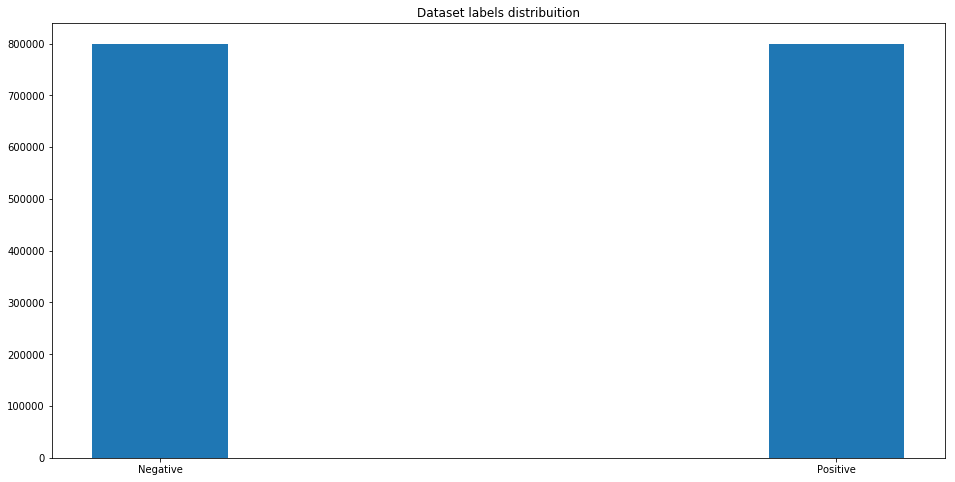

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline

target_cnt = Counter(original_training_df['polarity'])

plt.figure(figsize = (16, 8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.xticks([0, 4], ['Negative', 'Positive'])
plt.title("Dataset labels distribuition")

## Sampling

In order to ensure that our train / dev/ test /holdout sets follow the same probability distribution, since the dataset contains many samples and because half of them is Negative(0) and the other half is Positive(4) we cannot just take N random number of rows from the whole dataset and we need to distribute it beside the positive and negative samples which will be done as below.

The dataset contains thes same size of rows for Negative and Positive tweets, here we will keep a balanced set of 50000 positive and 50000 negative tweets taken randomly

In [6]:
num_rows_from_each_class = 100000
some_negative = original_training_df[original_training_df['polarity'] == 0].sample(num_rows_from_each_class)
some_positive = original_training_df[original_training_df['polarity'] == 4].sample(num_rows_from_each_class)

display(original_training_df.polarity.unique())
training_df = pd.concat([some_negative, some_positive])

array([0, 4])

## Preprocessing

In [7]:
import re

class Preprocess:
    @staticmethod
    def remove_tags(sentence):
        return re.sub(r'@[A-Za-z0-9]+', ' ', sentence)

    @staticmethod
    def remove_urls(sentence):
        return re.sub('https?://[A-Za-z0-9./]+', ' ', sentence)

    @staticmethod
    def remove_underscores(sentence):
        return re.sub(r'_[A-Za-z0-9]+', ' ', sentence)
    
    @staticmethod
    def remove_special_characters(sentence):
        return re.sub(r'\W', ' ', sentence)

    @staticmethod
    def remove_rem_tags(sentence):
        return re.sub(r'^@\s+', ' ', sentence)

    @staticmethod
    def remove_rem_underscores(sentence):
        return re.sub(r'^ _\s+', ' ', sentence)
    
    @staticmethod
    def remove_multiple_spaces(sentence):
        return re.sub(r' +', ' ', sentence)

    @staticmethod
    def remove_trailing_spaces(sentence):
        return sentence.strip()
    
def preprocess_row(row):
    row = Preprocess.remove_tags(row)
    row = Preprocess.remove_urls(row)
    row = Preprocess.remove_underscores(row)
    row = Preprocess.remove_special_characters(row)
    row = Preprocess.remove_rem_tags(row)
    row = Preprocess.remove_rem_underscores(row)
    row = Preprocess.remove_multiple_spaces(row)
    row = Preprocess.remove_trailing_spaces(row)
    row = row.lower()
    return row

In [8]:
df = training_df.copy()
df['text_before_preprocess'] = df['text']
df.drop(columns=['date', 'query'], axis = 1, inplace = True)
df['length_before_preprocess'] = df['text_before_preprocess'].str.len()
df.reset_index(drop = True, inplace = True)

In [9]:
df['text']= df['text'].apply(lambda row: preprocess_row(row))
df['length'] = df['text'].str.len()

## Keep only relevant data
We keep only the list of texts to create the embeddings
and the list of the polarity per tweet as target

In [10]:
corpus = df['text'].values.tolist()
target = df['polarity'].values.tolist()

In [11]:
# Drop duplicate tweets
df = df.drop_duplicates(subset=['user', 'text'], keep = 'first')

In [12]:
df.drop(columns = ['user'], axis = 1, inplace = True)
df.reset_index(drop = True, inplace = True)

## Train / Heldout / Dev sets

- Τraining set: will be used for the training of our MLP
- Heldout set: will be used for hyperparameter tuning
- Development (validation) set: will be used to monitor the performance of our MLP during training and optimization process

We have employed the established 50/25/25 rule.

In [13]:
import sklearn.model_selection

X_train, X_heldout_dev, y_train, y_heldout_dev = sklearn.model_selection.train_test_split(
    corpus, 
    target, 
    test_size = 0.25, 
    shuffle = True
)

X_heldout, X_dev, y_heldout, y_dev = sklearn.model_selection.train_test_split(
    X_heldout_dev, 
    y_heldout_dev, 
    test_size = 0.5, 
    shuffle = True
)

In [14]:
print('Size of X_train: ', len(X_train))
print('Size of X_heldout: ', len(X_heldout))
print('Size of X_dev: ', len(X_dev))
print('Size of y_train: ', len(y_train))
print('Size of y_heldout: ', len(y_heldout))
print('Size of y_dev: ', len(y_dev))

Size of X_train:  150000
Size of X_heldout:  25000
Size of X_dev:  25000
Size of y_train:  150000
Size of y_heldout:  25000
Size of y_dev:  25000


In [15]:
df_test = original_test_df.copy()
df_test.drop(columns = ['date', 'query', 'user'], axis = 1, inplace = True)
df_test.reset_index(drop = True, inplace = True)
df_test['text'] = df_test['text'].apply(lambda row: preprocess_row(row))
X_test = df_test['text'].values.tolist()
y_test = df_test['polarity'].values.tolist()

In [16]:
import itertools
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

le = preprocessing.LabelEncoder()
le.fit(y_dev)
y_dev = le.transform(y_dev)

le = preprocessing.LabelEncoder()
le.fit(y_heldout)
y_heldout = le.transform(y_heldout)

le = preprocessing.LabelEncoder()
le.fit(y_test)
y_test = le.transform(y_test)

In [17]:
def get_mismatched_tweets(x, y_true, y_pred):
    
    if(not (len(x) == len(y_true) == len(y_pred))):
        raise 'Invalid Sizes'
        
    return pd.DataFrame.from_dict([{'text': x[i], 'actual': y_true[i], 'predicted': y_pred[i]} for i in range(len(y_true)) if y_true[i] != y_pred[i]])

## Creating word embeddings

### TF/IDF vectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [19]:
tf_idf_vectorizer = TfidfVectorizer(
    ngram_range = (1, 3),
    max_features = 15000,
    sublinear_tf = True,
    lowercase = True,
    stop_words = stopwords.words('english')
)

vectorized_x_train = tf_idf_vectorizer.fit_transform(X_train).toarray()
vectorized_x_heldout = tf_idf_vectorizer.transform(X_heldout).toarray()
vectorized_x_dev = tf_idf_vectorizer.transform(X_dev).toarray()
vectorized_x_test = tf_idf_vectorizer.transform(X_test).toarray()

### Plots

### Statistics and Plots

In [20]:
def plot_history(history):
    fig = plt.figure(figsize = (20, 5))
    ax1 = fig.add_subplot(1, 3, 1)
    # Summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('model accuracy')
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epoch')
    ax1.legend(['train', 'test'], loc = 'upper left')

    ax2 = fig.add_subplot(1, 3, 2)
    # Summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('model loss')
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'test'], loc = 'upper left')

    ax3 = fig.add_subplot(1, 3, 3)
    # Summarize history for loss
    ax3.plot(history.history['f1'])
    ax3.plot(history.history['val_f1'])
    ax3.set_title('model f1')
    ax3.set_ylabel('f1')
    ax3.set_xlabel('epoch')
    ax3.legend(['train', 'test'], loc = 'upper left')

def print_evaluation(model, x_test, y_test):
    score = model.evaluate(x_test, y_test, verbose = 1, batch_size = 100)

    print('\nTest Binary_cross_entropy: %.4f' %  (score[0]))
    print('\nTest precision: %.4f' %  (score[1]))
    print('\nTest recall: %.4f' %  (score[2]))
    print('\nTest f1: %.4f' % (score[3]))
    print('\nTest accuracy: %.4f'% (score[4]))
    
def recall(y_true, y_pred):
    
    """
    Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    
    """
    Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))


def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)), axis=1)

Define some Keras callbacks:

- Checkpoint: we will use this callback to save the best trained MLP.
    
- Early stopping: we will use this callback to stop at the right time before overffiting. We chose to use min val_loss for early stopping monitoring.

In [21]:
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import ModelCheckpoint, EarlyStopping

def checkpoint(name):
    return ModelCheckpoint(
        name, 
        monitor = 'val_f1', 
        verbose = 1, 
        save_best_only = True, 
        mode = 'max'
    )

es = EarlyStopping(
    monitor = 'val_loss', 
    mode = 'min',
    patience = 5,
    verbose = 1
)

Using TensorFlow backend.


## Models

In [22]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category = sklearn.exceptions.UndefinedMetricWarning)
warnings.simplefilter(action = 'ignore', category = FutureWarning)

from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam
from keras import backend as K

### Manual Aproach

First of all we would like to find out how we can structure our model better.

We will start from the most base model and find out if we can have any better results going forward.
We will also add relu as our hidden layer neuro activation function and a sigmoid for the output layer
Every hidden layer will have a dropout of 0.2 rate because it will prevent inter-dependencies from emerging between nodes 
(I.e. nodes do not learn functions which rely on input values from another node), this will allow the network to learn a more robust relationship

W0623 03:45:39.490807 140346124695360 deprecation_wrapper.py:119] From /home/manos/.conda/envs/ta_assignment3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 03:45:39.506833 140346124695360 deprecation_wrapper.py:119] From /home/manos/.conda/envs/ta_assignment3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 03:45:39.509464 140346124695360 deprecation_wrapper.py:119] From /home/manos/.conda/envs/ta_assignment3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 03:45:39.524625 140346124695360 deprecation_wrapper.py:119] From /home/manos/.conda/envs/ta_assignment3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placehold

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 15001     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 15,003
Trainable params: 15,003
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples


Epoch 1/50


150000/150000 [==============================] - 28s 188us/step - loss: 0.6864 - precision: 0.5873 - recall: 0.3884 - f1: nan - accuracy: 0.5752 - val_loss: 0.6775 - val_precision: 0.8527 - val_recall: 0.4733 - val_f1: 0.6083 - val_accuracy: 0.6952

Epoch 00001: val_f1 improved from -inf to 0.60830, saving model to models/model_tf_idf_1_1
Epoch 2/50


150000/150000 [==============================] - 23s 155us/step - loss: 0.6669 - precision: 0.6916 - recall: 0.5686 - f1: 0.6234 - accuracy: 0.6578 - val_loss: 0.6554 - val_precision: 0.8157 - val_recall: 0.5958 - val_f1: 0.6882 - val_accuracy: 0.7300

Epoch 00002: val_f1 improved from 0.60830 to 0.68819, saving model to models/model_tf_idf_1_1
Epoch 3/50


150000/150000 [==============================] - 23s 155us/step - loss: 0.6436 - precision: 0.7046 - recall: 0.6470 - f1: 0.6742 - accuracy: 0.6879 - val_loss: 0.6312 - val_precision: 0.7823 - val_recall: 0.6918 - val_f1: 0.7339 - val_accuracy: 0.7491

Epoch 00003: val_f1 improved from 0.68819 to 0.73390, saving model to models/model_tf_idf_1_1
Epoch 4/50


150000/150000 [==============================] - 23s 152us/step - loss: 0.6218 - precision: 0.7046 - recall: 0.7057 - f1: 0.7049 - accuracy: 0.7049 - val_loss: 0.6088 - val_precision: 0.7593 - val_recall: 0.7449 - val_f1: 0.7517 - val_accuracy: 0.7540

Epoch 00004: val_f1 improved from 0.73390 to 0.75172, saving model to models/model_tf_idf_1_1
Epoch 5/50


150000/150000 [==============================] - 23s 156us/step - loss: 0.6032 - precision: 0.7041 - recall: 0.7404 - f1: 0.7216 - accuracy: 0.7147 - val_loss: 0.5894 - val_precision: 0.7493 - val_recall: 0.7660 - val_f1: 0.7573 - val_accuracy: 0.7544

Epoch 00005: val_f1 improved from 0.75172 to 0.75726, saving model to models/model_tf_idf_1_1
Epoch 6/50


150000/150000 [==============================] - 23s 156us/step - loss: 0.5876 - precision: 0.7045 - recall: 0.7637 - f1: 0.7327 - accuracy: 0.7218 - val_loss: 0.5733 - val_precision: 0.7463 - val_recall: 0.7779 - val_f1: 0.7615 - val_accuracy: 0.7563

Epoch 00006: val_f1 improved from 0.75726 to 0.76150, saving model to models/model_tf_idf_1_1
Epoch 7/50


150000/150000 [==============================] - 23s 152us/step - loss: 0.5767 - precision: 0.7029 - recall: 0.7786 - f1: 0.7386 - accuracy: 0.7249 - val_loss: 0.5608 - val_precision: 0.7413 - val_recall: 0.7907 - val_f1: 0.7649 - val_accuracy: 0.7569

Epoch 00007: val_f1 improved from 0.76150 to 0.76495, saving model to models/model_tf_idf_1_1
Epoch 8/50


150000/150000 [==============================] - 23s 154us/step - loss: 0.5681 - precision: 0.7030 - recall: 0.7893 - f1: 0.7435 - accuracy: 0.7280 - val_loss: 0.5511 - val_precision: 0.7377 - val_recall: 0.8001 - val_f1: 0.7674 - val_accuracy: 0.7574

Epoch 00008: val_f1 improved from 0.76495 to 0.76738, saving model to models/model_tf_idf_1_1
Epoch 9/50


150000/150000 [==============================] - 23s 153us/step - loss: 0.5614 - precision: 0.7017 - recall: 0.8015 - f1: 0.7481 - accuracy: 0.7305 - val_loss: 0.5431 - val_precision: 0.7388 - val_recall: 0.7993 - val_f1: 0.7676 - val_accuracy: 0.7579

Epoch 00009: val_f1 improved from 0.76738 to 0.76758, saving model to models/model_tf_idf_1_1
Epoch 10/50


150000/150000 [==============================] - 24s 161us/step - loss: 0.5546 - precision: 0.7041 - recall: 0.8071 - f1: 0.7519 - accuracy: 0.7340 - val_loss: 0.5368 - val_precision: 0.7377 - val_recall: 0.8032 - val_f1: 0.7688 - val_accuracy: 0.7584

Epoch 00010: val_f1 improved from 0.76758 to 0.76877, saving model to models/model_tf_idf_1_1
Epoch 11/50


150000/150000 [==============================] - 23s 156us/step - loss: 0.5494 - precision: 0.7045 - recall: 0.8123 - f1: 0.7543 - accuracy: 0.7358 - val_loss: 0.5321 - val_precision: 0.7346 - val_recall: 0.8103 - val_f1: 0.7703 - val_accuracy: 0.7584

Epoch 00011: val_f1 improved from 0.76877 to 0.77034, saving model to models/model_tf_idf_1_1
Epoch 12/50


150000/150000 [==============================] - 23s 156us/step - loss: 0.5469 - precision: 0.7024 - recall: 0.8222 - f1: 0.7574 - accuracy: 0.7369 - val_loss: 0.5283 - val_precision: 0.7352 - val_recall: 0.8100 - val_f1: 0.7706 - val_accuracy: 0.7588

Epoch 00012: val_f1 improved from 0.77034 to 0.77056, saving model to models/model_tf_idf_1_1
Epoch 13/50


150000/150000 [==============================] - 23s 153us/step - loss: 0.5440 - precision: 0.7025 - recall: 0.8302 - f1: 0.7609 - accuracy: 0.7394 - val_loss: 0.5251 - val_precision: 0.7348 - val_recall: 0.8116 - val_f1: 0.7710 - val_accuracy: 0.7589

Epoch 00013: val_f1 improved from 0.77056 to 0.77098, saving model to models/model_tf_idf_1_1
Epoch 14/50


150000/150000 [==============================] - 24s 157us/step - loss: 0.5419 - precision: 0.7014 - recall: 0.8357 - f1: 0.7625 - accuracy: 0.7401 - val_loss: 0.5229 - val_precision: 0.7350 - val_recall: 0.8106 - val_f1: 0.7707 - val_accuracy: 0.7588

Epoch 00014: val_f1 did not improve from 0.77098
Epoch 15/50


150000/150000 [==============================] - 24s 161us/step - loss: 0.5391 - precision: 0.7031 - recall: 0.8363 - f1: 0.7638 - accuracy: 0.7417 - val_loss: 0.5209 - val_precision: 0.7359 - val_recall: 0.8115 - val_f1: 0.7716 - val_accuracy: 0.7597

Epoch 00015: val_f1 improved from 0.77098 to 0.77155, saving model to models/model_tf_idf_1_1
Epoch 16/50


150000/150000 [==============================] - 24s 157us/step - loss: 0.5364 - precision: 0.7045 - recall: 0.8400 - f1: 0.7661 - accuracy: 0.7439 - val_loss: 0.5194 - val_precision: 0.7362 - val_recall: 0.8119 - val_f1: 0.7719 - val_accuracy: 0.7600

Epoch 00016: val_f1 improved from 0.77155 to 0.77188, saving model to models/model_tf_idf_1_1
Epoch 17/50


150000/150000 [==============================] - 23s 154us/step - loss: 0.5344 - precision: 0.7044 - recall: 0.8407 - f1: 0.7664 - accuracy: 0.7441 - val_loss: 0.5180 - val_precision: 0.7359 - val_recall: 0.8093 - val_f1: 0.7706 - val_accuracy: 0.7590

Epoch 00017: val_f1 did not improve from 0.77188
Epoch 18/50


150000/150000 [==============================] - 23s 152us/step - loss: 0.5326 - precision: 0.7047 - recall: 0.8444 - f1: 0.7681 - accuracy: 0.7453 - val_loss: 0.5174 - val_precision: 0.7340 - val_recall: 0.8141 - val_f1: 0.7717 - val_accuracy: 0.7592

Epoch 00018: val_f1 did not improve from 0.77188
Epoch 19/50


150000/150000 [==============================] - 23s 154us/step - loss: 0.5325 - precision: 0.7033 - recall: 0.8464 - f1: 0.7681 - accuracy: 0.7448 - val_loss: 0.5166 - val_precision: 0.7365 - val_recall: 0.8107 - val_f1: 0.7715 - val_accuracy: 0.7599

Epoch 00019: val_f1 did not improve from 0.77188
Epoch 20/50


150000/150000 [==============================] - 23s 153us/step - loss: 0.5304 - precision: 0.7045 - recall: 0.8471 - f1: 0.7691 - accuracy: 0.7459 - val_loss: 0.5163 - val_precision: 0.7344 - val_recall: 0.8134 - val_f1: 0.7716 - val_accuracy: 0.7592

Epoch 00020: val_f1 did not improve from 0.77188
Epoch 21/50


150000/150000 [==============================] - 23s 154us/step - loss: 0.5292 - precision: 0.7049 - recall: 0.8496 - f1: 0.7703 - accuracy: 0.7470 - val_loss: 0.5158 - val_precision: 0.7363 - val_recall: 0.8090 - val_f1: 0.7707 - val_accuracy: 0.7592

Epoch 00021: val_f1 did not improve from 0.77188
Epoch 22/50


150000/150000 [==============================] - 23s 154us/step - loss: 0.5287 - precision: 0.7052 - recall: 0.8492 - f1: 0.7704 - accuracy: 0.7471 - val_loss: 0.5155 - val_precision: 0.7348 - val_recall: 0.8102 - val_f1: 0.7704 - val_accuracy: 0.7585

Epoch 00022: val_f1 did not improve from 0.77188
Epoch 23/50


150000/150000 [==============================] - 23s 156us/step - loss: 0.5280 - precision: 0.7055 - recall: 0.8510 - f1: 0.7713 - accuracy: 0.7479 - val_loss: 0.5153 - val_precision: 0.7339 - val_recall: 0.8117 - val_f1: 0.7706 - val_accuracy: 0.7582

Epoch 00023: val_f1 did not improve from 0.77188
Epoch 24/50


150000/150000 [==============================] - 23s 156us/step - loss: 0.5254 - precision: 0.7066 - recall: 0.8523 - f1: 0.7725 - accuracy: 0.7493 - val_loss: 0.5149 - val_precision: 0.7350 - val_recall: 0.8080 - val_f1: 0.7695 - val_accuracy: 0.7579

Epoch 00024: val_f1 did not improve from 0.77188
Epoch 25/50


150000/150000 [==============================] - 23s 153us/step - loss: 0.5257 - precision: 0.7054 - recall: 0.8541 - f1: 0.7725 - accuracy: 0.7487 - val_loss: 0.5156 - val_precision: 0.7306 - val_recall: 0.8151 - val_f1: 0.7703 - val_accuracy: 0.7568

Epoch 00025: val_f1 did not improve from 0.77188
Epoch 26/50


150000/150000 [==============================] - 23s 152us/step - loss: 0.5231 - precision: 0.7076 - recall: 0.8551 - f1: 0.7742 - accuracy: 0.7509 - val_loss: 0.5156 - val_precision: 0.7304 - val_recall: 0.8151 - val_f1: 0.7702 - val_accuracy: 0.7567

Epoch 00026: val_f1 did not improve from 0.77188
Epoch 27/50


150000/150000 [==============================] - 23s 152us/step - loss: 0.5235 - precision: 0.7063 - recall: 0.8558 - f1: 0.7737 - accuracy: 0.7500 - val_loss: 0.5155 - val_precision: 0.7335 - val_recall: 0.8101 - val_f1: 0.7696 - val_accuracy: 0.7574

Epoch 00027: val_f1 did not improve from 0.77188
Epoch 28/50


150000/150000 [==============================] - 23s 153us/step - loss: 0.5233 - precision: 0.7061 - recall: 0.8571 - f1: 0.7742 - accuracy: 0.7503 - val_loss: 0.5159 - val_precision: 0.7315 - val_recall: 0.8119 - val_f1: 0.7693 - val_accuracy: 0.7565

Epoch 00028: val_f1 did not improve from 0.77188
Epoch 29/50


150000/150000 [==============================] - 23s 155us/step - loss: 0.5221 - precision: 0.7073 - recall: 0.8565 - f1: 0.7746 - accuracy: 0.7510 - val_loss: 0.5166 - val_precision: 0.7265 - val_recall: 0.8191 - val_f1: 0.7698 - val_accuracy: 0.7550

Epoch 00029: val_f1 did not improve from 0.77188
Epoch 00029: early stopping

25000/25000 [==============================] - 2s 89us/step

Test Binary_cross_entropy: 0.5098

Test precision: 0.7341

Test recall: 0.8285

Test f1: 0.7768

Test accuracy: 0.7643


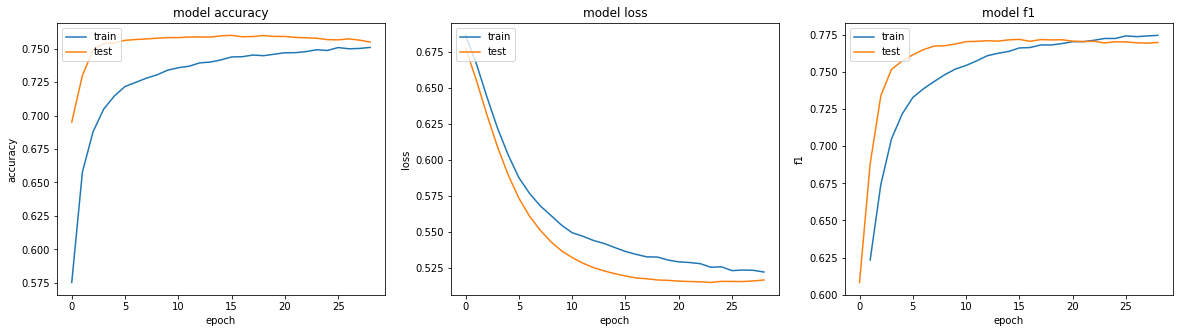

In [23]:
model = Sequential()
model.add(Dense(1, input_dim=vectorized_x_train.shape[1] , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,  activation = 'sigmoid'))

print(model.summary())
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.0, amsgrad = False),
    metrics = [precision, recall, f1, accuracy]
)

model_tf_idf_1_1 = model.fit(
    vectorized_x_train, 
    y_train,
    batch_size = 1000,
    epochs = 50,
    verbose = 1,
    callbacks = [checkpoint('models/model_tf_idf_1_1'), es, TQDMNotebookCallback()],
    validation_data=(vectorized_x_heldout, y_heldout),
    shuffle = True
)

plot_history(model_tf_idf_1_1)

print_evaluation(model, vectorized_x_dev, y_dev)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                240016    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 240,033
Trainable params: 240,033
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples


Epoch 1/50


150000/150000 [==============================] - 24s 159us/step - loss: 0.6371 - precision: 0.7291 - recall: 0.6979 - f1: 0.7114 - accuracy: 0.7201 - val_loss: 0.5762 - val_precision: 0.7402 - val_recall: 0.7687 - val_f1: 0.7539 - val_accuracy: 0.7491

Epoch 00001: val_f1 improved from -inf to 0.75394, saving model to models/model_tf_idf_1_2
Epoch 2/50


150000/150000 [==============================] - 23s 152us/step - loss: 0.5300 - precision: 0.7626 - recall: 0.7702 - f1: 0.7662 - accuracy: 0.7652 - val_loss: 0.5109 - val_precision: 0.7471 - val_recall: 0.7789 - val_f1: 0.7624 - val_accuracy: 0.7572

Epoch 00002: val_f1 improved from 0.75394 to 0.76238, saving model to models/model_tf_idf_1_2
Epoch 3/50


150000/150000 [==============================] - 23s 152us/step - loss: 0.4812 - precision: 0.7728 - recall: 0.7880 - f1: 0.7801 - accuracy: 0.7782 - val_loss: 0.4919 - val_precision: 0.7514 - val_recall: 0.7786 - val_f1: 0.7645 - val_accuracy: 0.7600

Epoch 00003: val_f1 improved from 0.76238 to 0.76448, saving model to models/model_tf_idf_1_2
Epoch 4/50


150000/150000 [==============================] - 23s 153us/step - loss: 0.4591 - precision: 0.7807 - recall: 0.8005 - f1: 0.7903 - accuracy: 0.7879 - val_loss: 0.4871 - val_precision: 0.7539 - val_recall: 0.7773 - val_f1: 0.7651 - val_accuracy: 0.7613

Epoch 00004: val_f1 improved from 0.76448 to 0.76513, saving model to models/model_tf_idf_1_2
Epoch 5/50


150000/150000 [==============================] - 23s 153us/step - loss: 0.4475 - precision: 0.7864 - recall: 0.8053 - f1: 0.7956 - accuracy: 0.7933 - val_loss: 0.4868 - val_precision: 0.7559 - val_recall: 0.7765 - val_f1: 0.7658 - val_accuracy: 0.7624

Epoch 00005: val_f1 improved from 0.76513 to 0.76576, saving model to models/model_tf_idf_1_2
Epoch 6/50


150000/150000 [==============================] - 23s 154us/step - loss: 0.4389 - precision: 0.7916 - recall: 0.8105 - f1: 0.8008 - accuracy: 0.7986 - val_loss: 0.4881 - val_precision: 0.7514 - val_recall: 0.7826 - val_f1: 0.7663 - val_accuracy: 0.7613

Epoch 00006: val_f1 improved from 0.76576 to 0.76633, saving model to models/model_tf_idf_1_2
Epoch 7/50


150000/150000 [==============================] - 23s 154us/step - loss: 0.4328 - precision: 0.7949 - recall: 0.8144 - f1: 0.8044 - accuracy: 0.8022 - val_loss: 0.4900 - val_precision: 0.7529 - val_recall: 0.7811 - val_f1: 0.7664 - val_accuracy: 0.7619

Epoch 00007: val_f1 improved from 0.76633 to 0.76640, saving model to models/model_tf_idf_1_2
Epoch 8/50


150000/150000 [==============================] - 23s 155us/step - loss: 0.4280 - precision: 0.7962 - recall: 0.8157 - f1: 0.8056 - accuracy: 0.8035 - val_loss: 0.4923 - val_precision: 0.7532 - val_recall: 0.7765 - val_f1: 0.7643 - val_accuracy: 0.7606

Epoch 00008: val_f1 did not improve from 0.76640
Epoch 9/50


150000/150000 [==============================] - 23s 154us/step - loss: 0.4237 - precision: 0.7986 - recall: 0.8178 - f1: 0.8080 - accuracy: 0.8059 - val_loss: 0.4948 - val_precision: 0.7498 - val_recall: 0.7822 - val_f1: 0.7653 - val_accuracy: 0.7601

Epoch 00009: val_f1 did not improve from 0.76640
Epoch 10/50


150000/150000 [==============================] - 23s 152us/step - loss: 0.4205 - precision: 0.8005 - recall: 0.8194 - f1: 0.8097 - accuracy: 0.8076 - val_loss: 0.4967 - val_precision: 0.7545 - val_recall: 0.7709 - val_f1: 0.7622 - val_accuracy: 0.7595

Epoch 00010: val_f1 did not improve from 0.76640
Epoch 00010: early stopping

25000/25000 [==============================] - 1s 58us/step

Test Binary_cross_entropy: 0.4861

Test precision: 0.7592

Test recall: 0.7767

Test f1: 0.7661

Test accuracy: 0.7651


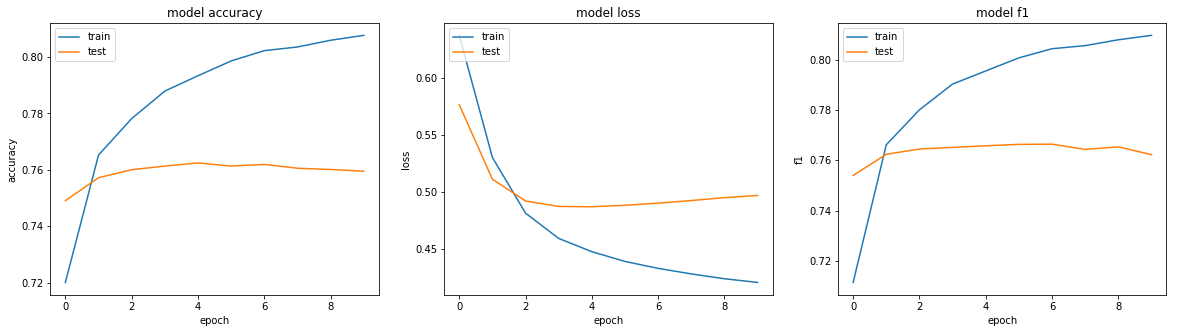

In [24]:
model = Sequential()
model.add(Dense(16, input_dim=vectorized_x_train.shape[1] , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,  activation = 'sigmoid'))

print(model.summary())
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.0, amsgrad = False),
    metrics = [precision, recall, f1, accuracy]
)

model_tf_idf_1_2 = model.fit(
    vectorized_x_train, 
    y_train,
    batch_size = 1000,
    epochs = 50,
    verbose = 1,
    callbacks = [checkpoint('models/model_tf_idf_1_2'), es, TQDMNotebookCallback()],
    validation_data = (vectorized_x_heldout, y_heldout),
    shuffle = True
)

plot_history(model_tf_idf_1_2)

print_evaluation(model, vectorized_x_dev, y_dev)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                480032    
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 480,065
Trainable params: 480,065
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples


Epoch 1/50


150000/150000 [==============================] - 24s 157us/step - loss: 0.6206 - precision: 0.7265 - recall: 0.7359 - f1: 0.7303 - accuracy: 0.7299 - val_loss: 0.5452 - val_precision: 0.7449 - val_recall: 0.7678 - val_f1: 0.7559 - val_accuracy: 0.7520

Epoch 00001: val_f1 improved from -inf to 0.75588, saving model to models/model_tf_idf_1_3
Epoch 2/50


150000/150000 [==============================] - 23s 153us/step - loss: 0.4989 - precision: 0.7677 - recall: 0.7832 - f1: 0.7752 - accuracy: 0.7732 - val_loss: 0.4940 - val_precision: 0.7481 - val_recall: 0.7837 - val_f1: 0.7652 - val_accuracy: 0.7594

Epoch 00002: val_f1 improved from 0.75588 to 0.76518, saving model to models/model_tf_idf_1_3
Epoch 3/50


150000/150000 [==============================] - 23s 153us/step - loss: 0.4598 - precision: 0.7806 - recall: 0.7992 - f1: 0.7896 - accuracy: 0.7873 - val_loss: 0.4868 - val_precision: 0.7511 - val_recall: 0.7820 - val_f1: 0.7660 - val_accuracy: 0.7611

Epoch 00003: val_f1 improved from 0.76518 to 0.76602, saving model to models/model_tf_idf_1_3
Epoch 4/50


150000/150000 [==============================] - 23s 154us/step - loss: 0.4438 - precision: 0.7872 - recall: 0.8083 - f1: 0.7974 - accuracy: 0.7949 - val_loss: 0.4876 - val_precision: 0.7562 - val_recall: 0.7746 - val_f1: 0.7649 - val_accuracy: 0.7620

Epoch 00004: val_f1 did not improve from 0.76602
Epoch 5/50


150000/150000 [==============================] - 23s 153us/step - loss: 0.4344 - precision: 0.7919 - recall: 0.8120 - f1: 0.8016 - accuracy: 0.7994 - val_loss: 0.4906 - val_precision: 0.7516 - val_recall: 0.7842 - val_f1: 0.7672 - val_accuracy: 0.7620

Epoch 00005: val_f1 improved from 0.76602 to 0.76724, saving model to models/model_tf_idf_1_3
Epoch 6/50


150000/150000 [==============================] - 23s 153us/step - loss: 0.4286 - precision: 0.7948 - recall: 0.8153 - f1: 0.8047 - accuracy: 0.8024 - val_loss: 0.4934 - val_precision: 0.7578 - val_recall: 0.7697 - val_f1: 0.7634 - val_accuracy: 0.7614

Epoch 00006: val_f1 did not improve from 0.76724
Epoch 7/50


150000/150000 [==============================] - 23s 154us/step - loss: 0.4234 - precision: 0.7988 - recall: 0.8162 - f1: 0.8072 - accuracy: 0.8054 - val_loss: 0.4961 - val_precision: 0.7558 - val_recall: 0.7693 - val_f1: 0.7622 - val_accuracy: 0.7599

Epoch 00007: val_f1 did not improve from 0.76724
Epoch 8/50


150000/150000 [==============================] - 23s 154us/step - loss: 0.4190 - precision: 0.8005 - recall: 0.8177 - f1: 0.8088 - accuracy: 0.8070 - val_loss: 0.4998 - val_precision: 0.7567 - val_recall: 0.7673 - val_f1: 0.7617 - val_accuracy: 0.7599

Epoch 00008: val_f1 did not improve from 0.76724
Epoch 00008: early stopping

25000/25000 [==============================] - 2s 69us/step

Test Binary_cross_entropy: 0.4880

Test precision: 0.7605

Test recall: 0.7727

Test f1: 0.7648

Test accuracy: 0.7645


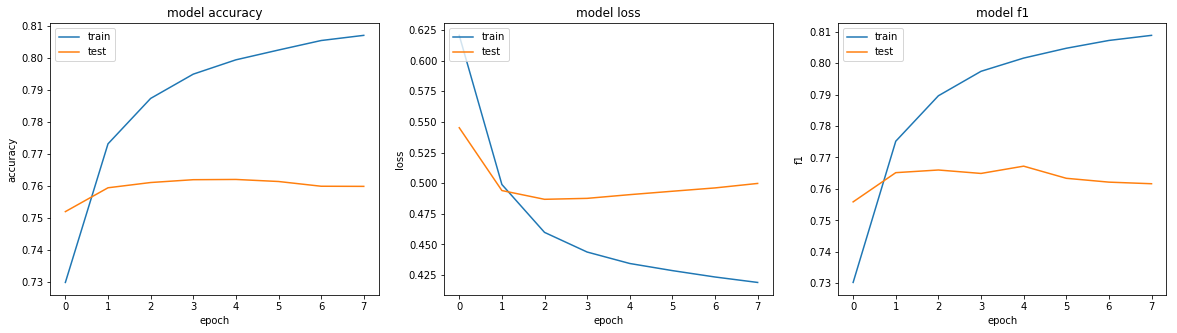

In [25]:
model = Sequential()
model.add(Dense(32, input_dim=vectorized_x_train.shape[1] , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,  activation = 'sigmoid'))

print(model.summary())
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.0, amsgrad = False),
    metrics = [precision, recall, f1, accuracy]
)

model_tf_idf_1_3 = model.fit(
    vectorized_x_train, 
    y_train,
    batch_size = 1000,
    epochs = 50,
    verbose = 1,
    callbacks = [checkpoint('models/model_tf_idf_1_3'), es, TQDMNotebookCallback()],
    validation_data = (vectorized_x_heldout, y_heldout),
    shuffle = True
)

plot_history(model_tf_idf_1_3)
print_evaluation(model, vectorized_x_dev, y_dev)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                960064    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 960,129
Trainable params: 960,129
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples


Epoch 1/50


150000/150000 [==============================] - 24s 163us/step - loss: 0.5936 - precision: 0.7203 - recall: 0.7747 - f1: 0.7453 - accuracy: 0.7345 - val_loss: 0.5125 - val_precision: 0.7505 - val_recall: 0.7687 - val_f1: 0.7592 - val_accuracy: 0.7562

Epoch 00001: val_f1 improved from -inf to 0.75923, saving model to models/model_tf_idf_1_4
Epoch 2/50


150000/150000 [==============================] - 24s 160us/step - loss: 0.4733 - precision: 0.7745 - recall: 0.7908 - f1: 0.7823 - accuracy: 0.7802 - val_loss: 0.4871 - val_precision: 0.7576 - val_recall: 0.7703 - val_f1: 0.7636 - val_accuracy: 0.7615

Epoch 00002: val_f1 improved from 0.75923 to 0.76360, saving model to models/model_tf_idf_1_4
Epoch 3/50


150000/150000 [==============================] - 24s 158us/step - loss: 0.4459 - precision: 0.7855 - recall: 0.8050 - f1: 0.7950 - accuracy: 0.7927 - val_loss: 0.4883 - val_precision: 0.7494 - val_recall: 0.7879 - val_f1: 0.7679 - val_accuracy: 0.7618

Epoch 00003: val_f1 improved from 0.76360 to 0.76786, saving model to models/model_tf_idf_1_4
Epoch 4/50


150000/150000 [==============================] - 24s 158us/step - loss: 0.4341 - precision: 0.7918 - recall: 0.8125 - f1: 0.8018 - accuracy: 0.7995 - val_loss: 0.4925 - val_precision: 0.7563 - val_recall: 0.7705 - val_f1: 0.7629 - val_accuracy: 0.7606

Epoch 00004: val_f1 did not improve from 0.76786
Epoch 5/50


150000/150000 [==============================] - 24s 158us/step - loss: 0.4276 - precision: 0.7950 - recall: 0.8139 - f1: 0.8041 - accuracy: 0.8021 - val_loss: 0.4966 - val_precision: 0.7527 - val_recall: 0.7725 - val_f1: 0.7621 - val_accuracy: 0.7588

Epoch 00005: val_f1 did not improve from 0.76786
Epoch 6/50


150000/150000 [==============================] - 24s 161us/step - loss: 0.4217 - precision: 0.7980 - recall: 0.8154 - f1: 0.8064 - accuracy: 0.8045 - val_loss: 0.5001 - val_precision: 0.7524 - val_recall: 0.7704 - val_f1: 0.7610 - val_accuracy: 0.7580

Epoch 00006: val_f1 did not improve from 0.76786
Epoch 7/50


150000/150000 [==============================] - 24s 159us/step - loss: 0.4169 - precision: 0.8013 - recall: 0.8152 - f1: 0.8080 - accuracy: 0.8066 - val_loss: 0.5028 - val_precision: 0.7589 - val_recall: 0.7561 - val_f1: 0.7572 - val_accuracy: 0.7575

Epoch 00007: val_f1 did not improve from 0.76786
Epoch 00007: early stopping

25000/25000 [==============================] - 2s 61us/step

Test Binary_cross_entropy: 0.4914

Test precision: 0.7637

Test recall: 0.7606

Test f1: 0.7603

Test accuracy: 0.7624


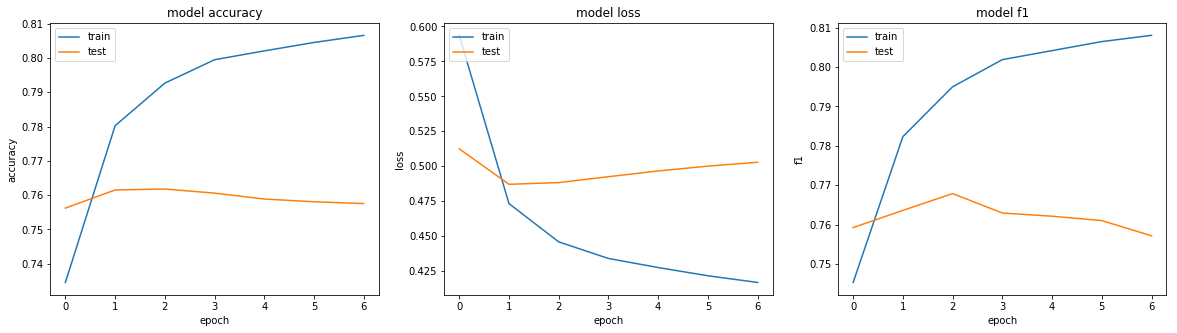

In [26]:
model = Sequential()
model.add(Dense(64, input_dim=vectorized_x_train.shape[1] , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,  activation='sigmoid'))

print(model.summary())
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.0, amsgrad = False),
    metrics = [precision, recall, f1, accuracy]
)

model_tf_idf_1_4 = model.fit(
    vectorized_x_train, 
    y_train,
    batch_size = 1000,
    epochs = 50,
    verbose = 1,
    callbacks = [checkpoint('models/model_tf_idf_1_4'), es, TQDMNotebookCallback()],
    validation_data = (vectorized_x_heldout, y_heldout),
    shuffle = True
)

plot_history(model_tf_idf_1_4)
print_evaluation(model, vectorized_x_dev, y_dev)

### Moving to models with more hidden layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                480032    
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 480,577
Trainable params: 480,577
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples


Epoch 1/50


150000/150000 [==============================] - 24s 160us/step - loss: 0.5918 - precision: 0.6940 - recall: 0.7998 - f1: 0.7370 - accuracy: 0.7111 - val_loss: 0.4968 - val_precision: 0.7485 - val_recall: 0.7770 - val_f1: 0.7622 - val_accuracy: 0.7575

Epoch 00001: val_f1 improved from -inf to 0.76224, saving model to models/model_tf_idf_2_1
Epoch 2/50


150000/150000 [==============================] - 24s 157us/step - loss: 0.4724 - precision: 0.7779 - recall: 0.7862 - f1: 0.7817 - accuracy: 0.7809 - val_loss: 0.4912 - val_precision: 0.7544 - val_recall: 0.7769 - val_f1: 0.7652 - val_accuracy: 0.7616

Epoch 00002: val_f1 improved from 0.76224 to 0.76520, saving model to models/model_tf_idf_2_1
Epoch 3/50


150000/150000 [==============================] - 23s 154us/step - loss: 0.4475 - precision: 0.7932 - recall: 0.8031 - f1: 0.7979 - accuracy: 0.7968 - val_loss: 0.4939 - val_precision: 0.7520 - val_recall: 0.7773 - val_f1: 0.7641 - val_accuracy: 0.7600

Epoch 00003: val_f1 did not improve from 0.76520
Epoch 4/50


150000/150000 [==============================] - 23s 154us/step - loss: 0.4326 - precision: 0.8006 - recall: 0.8133 - f1: 0.8066 - accuracy: 0.8053 - val_loss: 0.4974 - val_precision: 0.7493 - val_recall: 0.7773 - val_f1: 0.7628 - val_accuracy: 0.7582

Epoch 00004: val_f1 did not improve from 0.76520
Epoch 5/50


150000/150000 [==============================] - 23s 155us/step - loss: 0.4182 - precision: 0.8083 - recall: 0.8229 - f1: 0.8154 - accuracy: 0.8140 - val_loss: 0.5034 - val_precision: 0.7493 - val_recall: 0.7734 - val_f1: 0.7609 - val_accuracy: 0.7569

Epoch 00005: val_f1 did not improve from 0.76520
Epoch 6/50


150000/150000 [==============================] - 23s 156us/step - loss: 0.4026 - precision: 0.8192 - recall: 0.8301 - f1: 0.8245 - accuracy: 0.8235 - val_loss: 0.5119 - val_precision: 0.7476 - val_recall: 0.7745 - val_f1: 0.7606 - val_accuracy: 0.7562

Epoch 00006: val_f1 did not improve from 0.76520
Epoch 7/50


150000/150000 [==============================] - 23s 156us/step - loss: 0.3860 - precision: 0.8274 - recall: 0.8419 - f1: 0.8344 - accuracy: 0.8331 - val_loss: 0.5196 - val_precision: 0.7512 - val_recall: 0.7618 - val_f1: 0.7562 - val_accuracy: 0.7544

Epoch 00007: val_f1 did not improve from 0.76520
Epoch 00007: early stopping

25000/25000 [==============================] - 2s 65us/step

Test Binary_cross_entropy: 0.5071

Test precision: 0.7564

Test recall: 0.7679

Test f1: 0.7602

Test accuracy: 0.7601


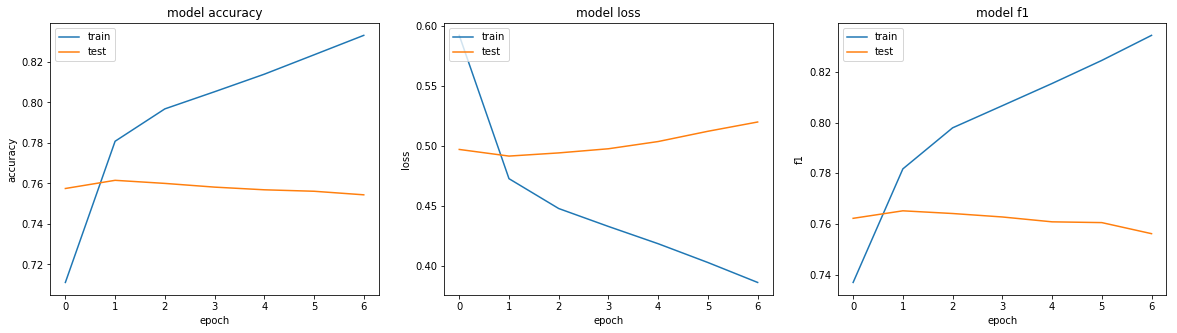

In [27]:
model = Sequential()
model.add(Dense(32, input_dim=vectorized_x_train.shape[1] , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16 , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,  activation='sigmoid'))

print(model.summary())
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.0, amsgrad = False),
    metrics = [precision, recall, f1, accuracy]
)

model_tf_idf_2_1 = model.fit(
    vectorized_x_train, 
    y_train,
    batch_size = 1000,
    epochs = 50,
    verbose = 1,
    callbacks = [checkpoint('models/model_tf_idf_2_1'), es, TQDMNotebookCallback()],
    validation_data = (vectorized_x_heldout, y_heldout),
    shuffle = True
)

plot_history(model_tf_idf_2_1)

print_evaluation(model, vectorized_x_dev, y_dev)

It is preety obvious that using a deeper MLP will not give us a better result, its more important to try and tune on parameters that may have a bigger impact at this point
like the learning rate and epochs.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                960064    
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 961,121
Trainable params: 961,121
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples


Epoch 1/20


150000/150000 [==============================] - 21s 137us/step - loss: 0.6138 - precision: 0.7402 - recall: 0.5953 - f1: 0.6467 - accuracy: 0.6972 - val_loss: 0.5154 - val_precision: 0.7476 - val_recall: 0.7794 - val_f1: 0.7613 - val_accuracy: 0.7578

Epoch 00001: val_f1 improved from -inf to 0.76132, saving model to models/model_tf_idf_1_5
Epoch 2/20


150000/150000 [==============================] - 20s 135us/step - loss: 0.4864 - precision: 0.7671 - recall: 0.7853 - f1: 0.7742 - accuracy: 0.7734 - val_loss: 0.4881 - val_precision: 0.7455 - val_recall: 0.7988 - val_f1: 0.7693 - val_accuracy: 0.7623

Epoch 00002: val_f1 improved from 0.76132 to 0.76929, saving model to models/model_tf_idf_1_5
Epoch 3/20


150000/150000 [==============================] - 20s 132us/step - loss: 0.4580 - precision: 0.7811 - recall: 0.8051 - f1: 0.7912 - accuracy: 0.7897 - val_loss: 0.4878 - val_precision: 0.7536 - val_recall: 0.7851 - val_f1: 0.7670 - val_accuracy: 0.7632

Epoch 00003: val_f1 did not improve from 0.76929
Epoch 4/20


150000/150000 [==============================] - 20s 131us/step - loss: 0.4449 - precision: 0.7882 - recall: 0.8106 - f1: 0.7976 - accuracy: 0.7964 - val_loss: 0.4905 - val_precision: 0.7540 - val_recall: 0.7804 - val_f1: 0.7649 - val_accuracy: 0.7620

Epoch 00004: val_f1 did not improve from 0.76929
Epoch 5/20


150000/150000 [==============================] - 19s 130us/step - loss: 0.4370 - precision: 0.7951 - recall: 0.8154 - f1: 0.8034 - accuracy: 0.8027 - val_loss: 0.4931 - val_precision: 0.7548 - val_recall: 0.7757 - val_f1: 0.7631 - val_accuracy: 0.7610

Epoch 00005: val_f1 did not improve from 0.76929
Epoch 6/20


150000/150000 [==============================] - 20s 132us/step - loss: 0.4284 - precision: 0.8008 - recall: 0.8176 - f1: 0.8076 - accuracy: 0.8070 - val_loss: 0.4967 - val_precision: 0.7518 - val_recall: 0.7788 - val_f1: 0.7630 - val_accuracy: 0.7601

Epoch 00006: val_f1 did not improve from 0.76929
Epoch 7/20


150000/150000 [==============================] - 19s 128us/step - loss: 0.4201 - precision: 0.8058 - recall: 0.8211 - f1: 0.8118 - accuracy: 0.8119 - val_loss: 0.5002 - val_precision: 0.7478 - val_recall: 0.7852 - val_f1: 0.7641 - val_accuracy: 0.7596

Epoch 00007: val_f1 did not improve from 0.76929
Epoch 8/20


150000/150000 [==============================] - 19s 126us/step - loss: 0.4129 - precision: 0.8106 - recall: 0.8254 - f1: 0.8163 - accuracy: 0.8163 - val_loss: 0.5049 - val_precision: 0.7522 - val_recall: 0.7723 - val_f1: 0.7601 - val_accuracy: 0.7582

Epoch 00008: val_f1 did not improve from 0.76929
Epoch 00008: early stopping



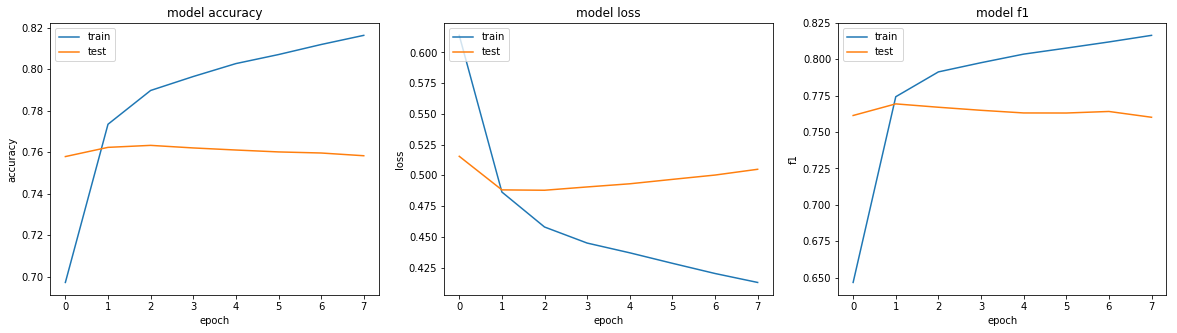

In [28]:
# {'learning_rate': 0.001, 'first_layer_num_neurons': 64, 'second_layer_num_neurons': 16, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 100, 'epochs': 20, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}


model = Sequential()
model.add(Dense(64, input_dim=vectorized_x_train.shape[1] , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,  activation='sigmoid'))

print(model.summary())
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.0001),
    metrics = [precision, recall, f1, accuracy]
)

model_tf_idf_1_5 = model.fit(
    vectorized_x_train, 
    y_train,
    batch_size = 100,
    epochs = 20,
    verbose = 1,
    callbacks = [checkpoint('models/model_tf_idf_1_5'), es, TQDMNotebookCallback()],
    validation_data = (vectorized_x_heldout, y_heldout),
    shuffle = True
)

plot_history(model_tf_idf_1_5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                240016    
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 240,033
Trainable params: 240,033
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples


Epoch 1/20


150000/150000 [==============================] - 18s 121us/step - loss: 0.5342 - precision: 0.7342 - recall: 0.7740 - f1: 0.7496 - accuracy: 0.7424 - val_loss: 0.4868 - val_precision: 0.7541 - val_recall: 0.7822 - val_f1: 0.7661 - val_accuracy: 0.7630

Epoch 00001: val_f1 improved from -inf to 0.76610, saving model to models/model_tf_idf_1_6
Epoch 2/20


150000/150000 [==============================] - 17s 113us/step - loss: 0.4569 - precision: 0.7818 - recall: 0.7953 - f1: 0.7868 - accuracy: 0.7865 - val_loss: 0.4864 - val_precision: 0.7636 - val_recall: 0.7579 - val_f1: 0.7587 - val_accuracy: 0.7611

Epoch 00002: val_f1 did not improve from 0.76610
Epoch 3/20


150000/150000 [==============================] - 19s 125us/step - loss: 0.4369 - precision: 0.7938 - recall: 0.8032 - f1: 0.7967 - accuracy: 0.7973 - val_loss: 0.4912 - val_precision: 0.7559 - val_recall: 0.7702 - val_f1: 0.7610 - val_accuracy: 0.7599

Epoch 00003: val_f1 did not improve from 0.76610
Epoch 4/20


150000/150000 [==============================] - 18s 122us/step - loss: 0.4224 - precision: 0.8029 - recall: 0.8093 - f1: 0.8045 - accuracy: 0.8055 - val_loss: 0.5002 - val_precision: 0.7558 - val_recall: 0.7655 - val_f1: 0.7586 - val_accuracy: 0.7582

Epoch 00004: val_f1 did not improve from 0.76610
Epoch 5/20


150000/150000 [==============================] - 17s 113us/step - loss: 0.4112 - precision: 0.8096 - recall: 0.8111 - f1: 0.8088 - accuracy: 0.8105 - val_loss: 0.5053 - val_precision: 0.7558 - val_recall: 0.7621 - val_f1: 0.7569 - val_accuracy: 0.7574

Epoch 00005: val_f1 did not improve from 0.76610
Epoch 6/20


150000/150000 [==============================] - 17s 111us/step - loss: 0.4000 - precision: 0.8176 - recall: 0.8163 - f1: 0.8154 - accuracy: 0.8172 - val_loss: 0.5168 - val_precision: 0.7602 - val_recall: 0.7562 - val_f1: 0.7562 - val_accuracy: 0.7584

Epoch 00006: val_f1 did not improve from 0.76610
Epoch 7/20


150000/150000 [==============================] - 17s 114us/step - loss: 0.3897 - precision: 0.8249 - recall: 0.8219 - f1: 0.8219 - accuracy: 0.8239 - val_loss: 0.5262 - val_precision: 0.7548 - val_recall: 0.7585 - val_f1: 0.7546 - val_accuracy: 0.7555

Epoch 00007: val_f1 did not improve from 0.76610
Epoch 00007: early stopping



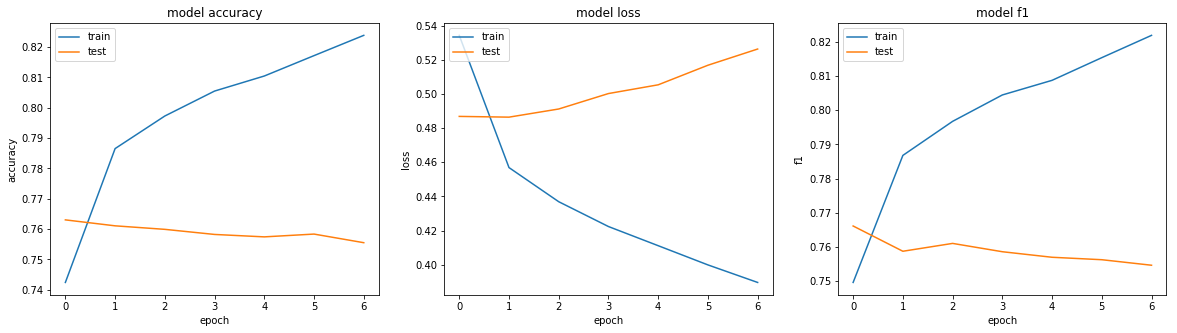

In [29]:
# {'learning_rate': 0.001, 'first_layer_num_neurons': 64, 'second_layer_num_neurons': 16, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 100, 'epochs': 20, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}


model = Sequential()
model.add(Dense(16, input_dim=vectorized_x_train.shape[1] , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,  activation='sigmoid'))

print(model.summary())
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.001),
    metrics = [precision, recall, f1, accuracy]
)

model_tf_idf_1_6 = model.fit(
    vectorized_x_train, 
    y_train,
    batch_size = 100,
    epochs = 20,
    verbose = 1,
    callbacks = [checkpoint('models/model_tf_idf_1_6'), es, TQDMNotebookCallback()],
    validation_data = (vectorized_x_heldout, y_heldout),
    shuffle = True
)

plot_history(model_tf_idf_1_6)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                240016    
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 240,033
Trainable params: 240,033
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples


Epoch 1/20


150000/150000 [==============================] - 17s 111us/step - loss: 0.6915 - precision: 0.5760 - recall: 0.5086 - f1: nan - accuracy: 0.5504 - val_loss: 0.6889 - val_precision: 0.7487 - val_recall: 0.3540 - val_f1: 0.4775 - val_accuracy: 0.6174

Epoch 00001: val_f1 improved from -inf to 0.47753, saving model to models/model_tf_idf_1_7
Epoch 2/20


150000/150000 [==============================] - 16s 106us/step - loss: 0.6856 - precision: 0.6395 - recall: 0.6146 - f1: 0.6079 - accuracy: 0.6222 - val_loss: 0.6819 - val_precision: 0.8542 - val_recall: 0.2367 - val_f1: 0.3669 - val_accuracy: 0.5978

Epoch 00002: val_f1 did not improve from 0.47753
Epoch 3/20


150000/150000 [==============================] - 16s 106us/step - loss: 0.6761 - precision: 0.6753 - recall: 0.6181 - f1: 0.6363 - accuracy: 0.6566 - val_loss: 0.6695 - val_precision: 0.7223 - val_recall: 0.6728 - val_f1: 0.6942 - val_accuracy: 0.7066

Epoch 00003: val_f1 improved from 0.47753 to 0.69421, saving model to models/model_tf_idf_1_7
Epoch 4/20


150000/150000 [==============================] - 17s 112us/step - loss: 0.6610 - precision: 0.6864 - recall: 0.6587 - f1: 0.6667 - accuracy: 0.6767 - val_loss: 0.6508 - val_precision: 0.7064 - val_recall: 0.7481 - val_f1: 0.7243 - val_accuracy: 0.7178

Epoch 00004: val_f1 improved from 0.69421 to 0.72430, saving model to models/model_tf_idf_1_7
Epoch 5/20


150000/150000 [==============================] - 16s 106us/step - loss: 0.6397 - precision: 0.6960 - recall: 0.6754 - f1: 0.6814 - accuracy: 0.6888 - val_loss: 0.6268 - val_precision: 0.7527 - val_recall: 0.6433 - val_f1: 0.6909 - val_accuracy: 0.7153

Epoch 00005: val_f1 did not improve from 0.72430
Epoch 6/20


150000/150000 [==============================] - 15s 103us/step - loss: 0.6152 - precision: 0.7067 - recall: 0.6964 - f1: 0.6983 - accuracy: 0.7030 - val_loss: 0.6019 - val_precision: 0.7648 - val_recall: 0.6258 - val_f1: 0.6857 - val_accuracy: 0.7160

Epoch 00006: val_f1 did not improve from 0.72430
Epoch 7/20


150000/150000 [==============================] - 16s 107us/step - loss: 0.5914 - precision: 0.7145 - recall: 0.7077 - f1: 0.7080 - accuracy: 0.7117 - val_loss: 0.5792 - val_precision: 0.7248 - val_recall: 0.7492 - val_f1: 0.7345 - val_accuracy: 0.7318

Epoch 00007: val_f1 improved from 0.72430 to 0.73446, saving model to models/model_tf_idf_1_7
Epoch 8/20


150000/150000 [==============================] - 16s 109us/step - loss: 0.5712 - precision: 0.7214 - recall: 0.7265 - f1: 0.7214 - accuracy: 0.7226 - val_loss: 0.5619 - val_precision: 0.7515 - val_recall: 0.6987 - val_f1: 0.7216 - val_accuracy: 0.7330

Epoch 00008: val_f1 did not improve from 0.73446
Epoch 9/20


150000/150000 [==============================] - 16s 103us/step - loss: 0.5554 - precision: 0.7280 - recall: 0.7377 - f1: 0.7304 - accuracy: 0.7307 - val_loss: 0.5478 - val_precision: 0.7207 - val_recall: 0.7804 - val_f1: 0.7472 - val_accuracy: 0.7384

Epoch 00009: val_f1 improved from 0.73446 to 0.74723, saving model to models/model_tf_idf_1_7
Epoch 10/20


150000/150000 [==============================] - 16s 109us/step - loss: 0.5424 - precision: 0.7320 - recall: 0.7482 - f1: 0.7375 - accuracy: 0.7369 - val_loss: 0.5375 - val_precision: 0.7202 - val_recall: 0.7889 - val_f1: 0.7509 - val_accuracy: 0.7407

Epoch 00010: val_f1 improved from 0.74723 to 0.75094, saving model to models/model_tf_idf_1_7
Epoch 11/20


150000/150000 [==============================] - 17s 112us/step - loss: 0.5324 - precision: 0.7380 - recall: 0.7561 - f1: 0.7447 - accuracy: 0.7436 - val_loss: 0.5289 - val_precision: 0.7415 - val_recall: 0.7541 - val_f1: 0.7457 - val_accuracy: 0.7452

Epoch 00011: val_f1 did not improve from 0.75094
Epoch 12/20


150000/150000 [==============================] - 16s 108us/step - loss: 0.5240 - precision: 0.7416 - recall: 0.7644 - f1: 0.7506 - accuracy: 0.7488 - val_loss: 0.5232 - val_precision: 0.7360 - val_recall: 0.7709 - val_f1: 0.7511 - val_accuracy: 0.7468

Epoch 00012: val_f1 improved from 0.75094 to 0.75110, saving model to models/model_tf_idf_1_7
Epoch 13/20


150000/150000 [==============================] - 16s 110us/step - loss: 0.5172 - precision: 0.7452 - recall: 0.7687 - f1: 0.7546 - accuracy: 0.7528 - val_loss: 0.5187 - val_precision: 0.7636 - val_recall: 0.7183 - val_f1: 0.7381 - val_accuracy: 0.7473

Epoch 00013: val_f1 did not improve from 0.75110
Epoch 14/20


150000/150000 [==============================] - 16s 108us/step - loss: 0.5108 - precision: 0.7487 - recall: 0.7742 - f1: 0.7591 - accuracy: 0.7570 - val_loss: 0.5135 - val_precision: 0.7332 - val_recall: 0.7918 - val_f1: 0.7595 - val_accuracy: 0.7515

Epoch 00014: val_f1 improved from 0.75110 to 0.75946, saving model to models/model_tf_idf_1_7
Epoch 15/20


150000/150000 [==============================] - 16s 110us/step - loss: 0.5056 - precision: 0.7510 - recall: 0.7791 - f1: 0.7626 - accuracy: 0.7599 - val_loss: 0.5103 - val_precision: 0.7521 - val_recall: 0.7563 - val_f1: 0.7522 - val_accuracy: 0.7531

Epoch 00015: val_f1 did not improve from 0.75946
Epoch 16/20


150000/150000 [==============================] - 17s 112us/step - loss: 0.5002 - precision: 0.7545 - recall: 0.7814 - f1: 0.7656 - accuracy: 0.7636 - val_loss: 0.5066 - val_precision: 0.7429 - val_recall: 0.7816 - val_f1: 0.7597 - val_accuracy: 0.7550

Epoch 00016: val_f1 improved from 0.75946 to 0.75971, saving model to models/model_tf_idf_1_7
Epoch 17/20


150000/150000 [==============================] - 17s 112us/step - loss: 0.4962 - precision: 0.7568 - recall: 0.7846 - f1: 0.7684 - accuracy: 0.7661 - val_loss: 0.5052 - val_precision: 0.7305 - val_recall: 0.8063 - val_f1: 0.7647 - val_accuracy: 0.7540

Epoch 00017: val_f1 improved from 0.75971 to 0.76469, saving model to models/model_tf_idf_1_7
Epoch 18/20


150000/150000 [==============================] - 18s 122us/step - loss: 0.4931 - precision: 0.7596 - recall: 0.7887 - f1: 0.7719 - accuracy: 0.7693 - val_loss: 0.5016 - val_precision: 0.7460 - val_recall: 0.7809 - val_f1: 0.7610 - val_accuracy: 0.7570

Epoch 00018: val_f1 did not improve from 0.76469
Epoch 19/20


150000/150000 [==============================] - 16s 104us/step - loss: 0.4895 - precision: 0.7610 - recall: 0.7908 - f1: 0.7735 - accuracy: 0.7709 - val_loss: 0.5002 - val_precision: 0.7357 - val_recall: 0.8034 - val_f1: 0.7662 - val_accuracy: 0.7570

Epoch 00019: val_f1 improved from 0.76469 to 0.76620, saving model to models/model_tf_idf_1_7
Epoch 20/20


150000/150000 [==============================] - 16s 104us/step - loss: 0.4861 - precision: 0.7635 - recall: 0.7912 - f1: 0.7749 - accuracy: 0.7727 - val_loss: 0.4983 - val_precision: 0.7392 - val_recall: 0.8007 - val_f1: 0.7669 - val_accuracy: 0.7588

Epoch 00020: val_f1 improved from 0.76620 to 0.76693, saving model to models/model_tf_idf_1_7



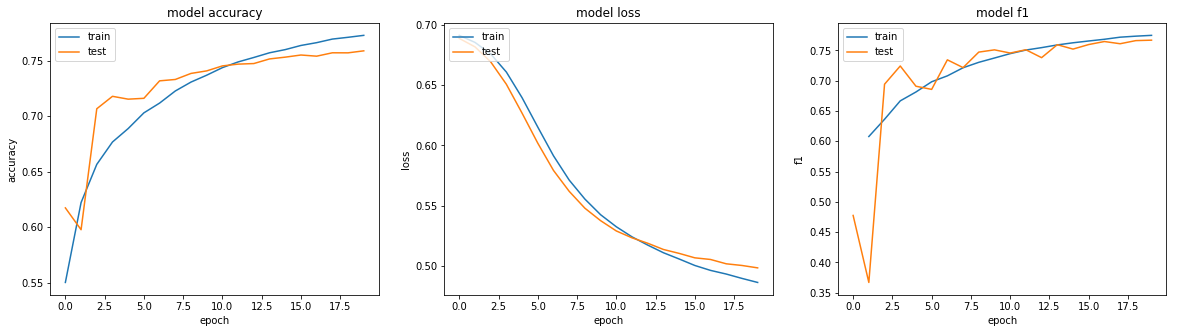

In [30]:
from keras import optimizers 
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.6, nesterov=True)

model = Sequential()
model.add(Dense(16, input_dim=vectorized_x_train.shape[1] , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,  activation='sigmoid'))

print(model.summary())
model.compile(
    loss = 'binary_crossentropy',
    optimizer = sgd,
    metrics = [precision, recall, f1, accuracy]
)

model_tf_idf_1_7 = model.fit(
    vectorized_x_train, 
    y_train,
    batch_size = 100,
    epochs = 20,
    verbose = 1,
    callbacks = [checkpoint('models/model_tf_idf_1_7'), es, TQDMNotebookCallback()],
    validation_data = (vectorized_x_heldout, y_heldout),
    shuffle = True
)

plot_history(model_tf_idf_1_7)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                240016    
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 240,033
Trainable params: 240,033
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples


Epoch 1/20


150000/150000 [==============================] - 19s 126us/step - loss: 0.5671 - precision: 0.7244 - recall: 0.6988 - f1: nan - accuracy: 0.7160 - val_loss: 0.5072 - val_precision: 0.7400 - val_recall: 0.7848 - val_f1: 0.7598 - val_accuracy: 0.7541

Epoch 00001: val_f1 improved from -inf to 0.75981, saving model to models/model_tf_idf_1_8
Epoch 2/20


150000/150000 [==============================] - 18s 120us/step - loss: 0.4900 - precision: 0.7572 - recall: 0.7891 - f1: 0.7710 - accuracy: 0.7682 - val_loss: 0.4933 - val_precision: 0.7410 - val_recall: 0.7962 - val_f1: 0.7658 - val_accuracy: 0.7586

Epoch 00002: val_f1 improved from 0.75981 to 0.76577, saving model to models/model_tf_idf_1_8
Epoch 3/20


150000/150000 [==============================] - 17s 115us/step - loss: 0.4719 - precision: 0.7698 - recall: 0.8011 - f1: 0.7833 - accuracy: 0.7805 - val_loss: 0.4887 - val_precision: 0.7496 - val_recall: 0.7892 - val_f1: 0.7670 - val_accuracy: 0.7623

Epoch 00003: val_f1 improved from 0.76577 to 0.76701, saving model to models/model_tf_idf_1_8
Epoch 4/20


150000/150000 [==============================] - 18s 118us/step - loss: 0.4621 - precision: 0.7749 - recall: 0.8053 - f1: 0.7881 - accuracy: 0.7858 - val_loss: 0.4881 - val_precision: 0.7627 - val_recall: 0.7642 - val_f1: 0.7615 - val_accuracy: 0.7627

Epoch 00004: val_f1 did not improve from 0.76701
Epoch 5/20


150000/150000 [==============================] - 19s 125us/step - loss: 0.4565 - precision: 0.7803 - recall: 0.8089 - f1: 0.7927 - accuracy: 0.7904 - val_loss: 0.4871 - val_precision: 0.7551 - val_recall: 0.7824 - val_f1: 0.7665 - val_accuracy: 0.7637

Epoch 00005: val_f1 did not improve from 0.76701
Epoch 6/20


150000/150000 [==============================] - 18s 117us/step - loss: 0.4514 - precision: 0.7826 - recall: 0.8125 - f1: 0.7956 - accuracy: 0.7937 - val_loss: 0.4884 - val_precision: 0.7522 - val_recall: 0.7902 - val_f1: 0.7688 - val_accuracy: 0.7643

Epoch 00006: val_f1 improved from 0.76701 to 0.76885, saving model to models/model_tf_idf_1_8
Epoch 7/20


150000/150000 [==============================] - 17s 115us/step - loss: 0.4478 - precision: 0.7844 - recall: 0.8154 - f1: 0.7980 - accuracy: 0.7958 - val_loss: 0.4886 - val_precision: 0.7533 - val_recall: 0.7845 - val_f1: 0.7666 - val_accuracy: 0.7630

Epoch 00007: val_f1 did not improve from 0.76885
Epoch 8/20


150000/150000 [==============================] - 17s 114us/step - loss: 0.4451 - precision: 0.7861 - recall: 0.8183 - f1: 0.8004 - accuracy: 0.7979 - val_loss: 0.4887 - val_precision: 0.7498 - val_recall: 0.7917 - val_f1: 0.7682 - val_accuracy: 0.7630

Epoch 00008: val_f1 did not improve from 0.76885
Epoch 9/20


150000/150000 [==============================] - 19s 124us/step - loss: 0.4428 - precision: 0.7869 - recall: 0.8192 - f1: 0.8011 - accuracy: 0.7987 - val_loss: 0.4889 - val_precision: 0.7532 - val_recall: 0.7862 - val_f1: 0.7673 - val_accuracy: 0.7635

Epoch 00009: val_f1 did not improve from 0.76885
Epoch 10/20


150000/150000 [==============================] - 18s 120us/step - loss: 0.4408 - precision: 0.7877 - recall: 0.8210 - f1: 0.8024 - accuracy: 0.7999 - val_loss: 0.4903 - val_precision: 0.7539 - val_recall: 0.7857 - val_f1: 0.7675 - val_accuracy: 0.7640

Epoch 00010: val_f1 did not improve from 0.76885
Epoch 00010: early stopping



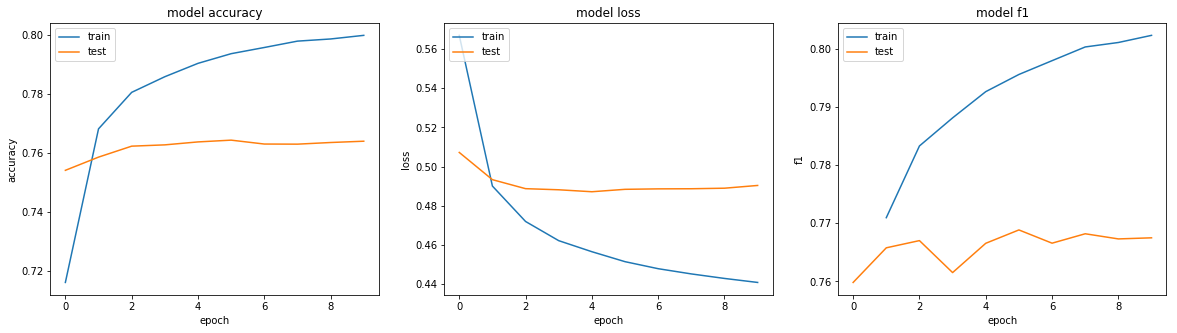

In [31]:
adadelta = optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

model = Sequential()
model.add(Dense(16, input_dim=vectorized_x_train.shape[1] , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,  activation='sigmoid'))

print(model.summary())
model.compile(
    loss = 'binary_crossentropy',
    optimizer = adadelta,
    metrics = [precision, recall, f1, accuracy]
)

model_tf_idf_1_8 = model.fit(
    vectorized_x_train,
    y_train,
    batch_size = 100,
    epochs = 20,
    verbose = 1,
    callbacks = [checkpoint('models/model_tf_idf_1_8'), es, TQDMNotebookCallback()],
    validation_data = (vectorized_x_heldout, y_heldout),
    shuffle = True
)

plot_history(model_tf_idf_1_8)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                240016    
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 17        
Total params: 240,033
Trainable params: 240,033
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples


Epoch 1/20


150000/150000 [==============================] - 18s 122us/step - loss: 0.5306 - precision: 0.7408 - recall: 0.7542 - f1: 0.7422 - accuracy: 0.7446 - val_loss: 0.4872 - val_precision: 0.7571 - val_recall: 0.7734 - val_f1: 0.7632 - val_accuracy: 0.7619

Epoch 00001: val_f1 improved from -inf to 0.76321, saving model to models/model_tf_idf_1_9
Epoch 2/20


150000/150000 [==============================] - 19s 129us/step - loss: 0.4559 - precision: 0.7811 - recall: 0.7971 - f1: 0.7872 - accuracy: 0.7868 - val_loss: 0.4871 - val_precision: 0.7539 - val_recall: 0.7782 - val_f1: 0.7639 - val_accuracy: 0.7612

Epoch 00002: val_f1 improved from 0.76321 to 0.76388, saving model to models/model_tf_idf_1_9
Epoch 3/20


150000/150000 [==============================] - 19s 124us/step - loss: 0.4360 - precision: 0.7937 - recall: 0.8051 - f1: 0.7976 - accuracy: 0.7979 - val_loss: 0.4937 - val_precision: 0.7546 - val_recall: 0.7712 - val_f1: 0.7609 - val_accuracy: 0.7596

Epoch 00003: val_f1 did not improve from 0.76388
Epoch 4/20


150000/150000 [==============================] - 17s 114us/step - loss: 0.4211 - precision: 0.8026 - recall: 0.8101 - f1: 0.8047 - accuracy: 0.8054 - val_loss: 0.4993 - val_precision: 0.7522 - val_recall: 0.7728 - val_f1: 0.7603 - val_accuracy: 0.7582

Epoch 00004: val_f1 did not improve from 0.76388
Epoch 5/20


150000/150000 [==============================] - 17s 116us/step - loss: 0.4086 - precision: 0.8112 - recall: 0.8149 - f1: 0.8115 - accuracy: 0.8128 - val_loss: 0.5069 - val_precision: 0.7605 - val_recall: 0.7550 - val_f1: 0.7557 - val_accuracy: 0.7579

Epoch 00005: val_f1 did not improve from 0.76388
Epoch 6/20


150000/150000 [==============================] - 18s 121us/step - loss: 0.3983 - precision: 0.8193 - recall: 0.8216 - f1: 0.8188 - accuracy: 0.8199 - val_loss: 0.5178 - val_precision: 0.7555 - val_recall: 0.7615 - val_f1: 0.7564 - val_accuracy: 0.7569

Epoch 00006: val_f1 did not improve from 0.76388
Epoch 7/20


150000/150000 [==============================] - 18s 117us/step - loss: 0.3872 - precision: 0.8263 - recall: 0.8267 - f1: 0.8250 - accuracy: 0.8264 - val_loss: 0.5295 - val_precision: 0.7521 - val_recall: 0.7627 - val_f1: 0.7553 - val_accuracy: 0.7549

Epoch 00007: val_f1 did not improve from 0.76388
Epoch 00007: early stopping



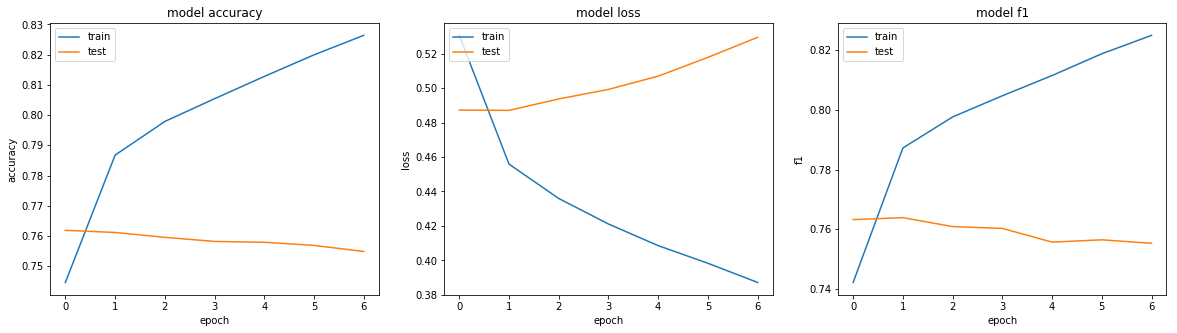

In [32]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model = Sequential()
model.add(Dense(16, input_dim=vectorized_x_train.shape[1] , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,  activation='sigmoid'))

print(model.summary())
model.compile(
    loss = 'binary_crossentropy',
    optimizer = adam,
    metrics = [precision, recall, f1, accuracy]
)

model_tf_idf_1_9 = model.fit(
    vectorized_x_train,
    y_train,
    batch_size = 100,
    epochs = 20,
    verbose = 1,
    callbacks = [checkpoint('models/model_tf_idf_1_9'), es, TQDMNotebookCallback()],
    validation_data = (vectorized_x_heldout, y_heldout),
    shuffle = True
)

plot_history(model_tf_idf_1_9)

### Automated Approach

Since it is impossible to manually search or the hyperapameter space we used talos to automate it some way after we got a first view of
the network shape

basically our problem seems very simple for an MLP, this can be seen basically because the maximum acc score on the validation set does not increase more by using more neurons
or layers. Moreover through monitoring the validation_loss and validation_acc of course by using more epochs or more elaborate schemas the network was able to achieve better accuracy on the training set
on sequantial epochs, but the validation accurracy was falling which is a clear indication that MLP is able to learn the data, but was overfitting easily.

In [33]:
import talos as ta
from talos.model.early_stopper import early_stopper            
from talos.model.layers import hidden_layers

from keras.layers import InputLayer

def mlp(x_train, y_train, x_dev, y_dev, parameters):
    from keras.models import Sequential
    from keras.layers import Dropout, Dense
    from keras.losses import binary_crossentropy
    
    from talos.model.normalizers import lr_normalizer
    
    model = Sequential()
    model.add(Dense(parameters['first_layer_num_neurons'], input_dim = x_train.shape[1], activation = parameters['first_layer_activation']))
    model.add(Dropout(rate = parameters['dropout']))
    
    if(parameters['second_layer_num_neurons'] != 'inactive'):
        model.add(Dense(parameters['second_layer_num_neurons'], activation = parameters['second_layer_activation']))
        model.add(Dropout(rate = parameters['dropout']))
    
    model.add(Dense(1, activation = parameters['last_layer_activation_function']))
    
    model.compile(
        loss = 'binary_crossentropy',
        optimizer = parameters['optimizer'](lr = lr_normalizer(parameters['learning_rate'], parameters['optimizer'])),
        metrics=['acc', precision, recall, f1, accuracy]
    )
    
    print(model.summary())
    callbacks = [early_stopper(parameters['epochs'], mode = 'strict')]
    history = model.fit(
        x_train, 
        y_train,
        batch_size = parameters['batch_size'],
        epochs = parameters['epochs'],
        verbose = 2,
        validation_data = [x_dev, y_dev],
        callbacks=callbacks
    )
    
    return history, model

from keras.optimizers import Adam, Adadelta
from keras.activations import sigmoid
from keras.losses import binary_crossentropy

hyperparameters = {
    'learning_rate': [1e-3, 0.01],
    'first_layer_num_neurons':[16, 32, 64],
    'second_layer_num_neurons':['inactive', 8, 16, 32],
    'first_layer_activation': ['relu'],
    'second_layer_activation': ['relu'],
    'batch_size': [100, 200],
    'epochs': [20, 50],
    'dropout': [0.2, 0.3, 0.5],
    'optimizer': [Adam],
    'last_layer_activation_function': ['sigmoid'],
    'weight_regulizer': [None]
}

history_talos_tf_idf = ta.Scan(
    x = vectorized_x_train, 
    y = y_train, 
    x_val = vectorized_x_heldout,
    y_val = y_heldout,
    params = hyperparameters,
    model = mlp,
    # Random search parameter
    grid_downsample = 0.1,
    dataset_name = 'twitter-sentiment-analysis',
    print_params = True
)

  0%|          | 0/28 [00:00<?, ?it/s]

{'learning_rate': 0.001, 'first_layer_num_neurons': 32, 'second_layer_num_neurons': 32, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 50, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 32)                480032    
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_25 (Dense) 

  4%|▎         | 1/28 [09:14<4:09:36, 554.70s/it]

{'learning_rate': 0.01, 'first_layer_num_neurons': 16, 'second_layer_num_neurons': 'inactive', 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 20, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                240016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 240,033
Trainable params: 240,033
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples
Epoch 1/20
 - 

  7%|▋         | 2/28 [12:45<3:15:43, 451.66s/it]

{'learning_rate': 0.01, 'first_layer_num_neurons': 32, 'second_layer_num_neurons': 32, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 50, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                480032    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)   

 11%|█         | 3/28 [20:58<3:13:20, 464.02s/it]

{'learning_rate': 0.01, 'first_layer_num_neurons': 64, 'second_layer_num_neurons': 16, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 100, 'epochs': 50, 'dropout': 0.3, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                960064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)   

 14%|█▍        | 4/28 [30:54<3:21:23, 503.49s/it]

{'learning_rate': 0.001, 'first_layer_num_neurons': 16, 'second_layer_num_neurons': 'inactive', 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 50, 'dropout': 0.5, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                240016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 240,033
Trainable params: 240,033
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples
Epoch 1/50
 -

 18%|█▊        | 5/28 [40:14<3:19:32, 520.55s/it]

{'learning_rate': 0.01, 'first_layer_num_neurons': 16, 'second_layer_num_neurons': 16, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 100, 'epochs': 50, 'dropout': 0.5, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                240016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)   

 21%|██▏       | 6/28 [54:48<3:49:44, 626.55s/it]

{'learning_rate': 0.001, 'first_layer_num_neurons': 64, 'second_layer_num_neurons': 'inactive', 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 100, 'epochs': 20, 'dropout': 0.3, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                960064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 960,129
Trainable params: 960,129
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples
Epoch 1/20
 -

 25%|██▌       | 7/28 [1:00:56<3:12:08, 548.97s/it]

{'learning_rate': 0.001, 'first_layer_num_neurons': 32, 'second_layer_num_neurons': 'inactive', 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 50, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                480032    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 480,065
Trainable params: 480,065
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples
Epoch 1/50
 -

 29%|██▊       | 8/28 [1:10:56<3:08:02, 564.11s/it]

{'learning_rate': 0.001, 'first_layer_num_neurons': 32, 'second_layer_num_neurons': 16, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 100, 'epochs': 50, 'dropout': 0.3, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                480032    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)  

 32%|███▏      | 9/28 [1:25:00<3:25:13, 648.09s/it]

{'learning_rate': 0.01, 'first_layer_num_neurons': 32, 'second_layer_num_neurons': 16, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 100, 'epochs': 50, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                480032    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)   

 36%|███▌      | 10/28 [1:33:52<3:04:01, 613.41s/it]

{'learning_rate': 0.001, 'first_layer_num_neurons': 32, 'second_layer_num_neurons': 32, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 20, 'dropout': 0.3, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                480032    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)  

 39%|███▉      | 11/28 [1:37:23<2:19:35, 492.68s/it]

{'learning_rate': 0.01, 'first_layer_num_neurons': 64, 'second_layer_num_neurons': 32, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 20, 'dropout': 0.3, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                960064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)   

 43%|████▎     | 12/28 [1:41:06<1:49:46, 411.66s/it]

{'learning_rate': 0.01, 'first_layer_num_neurons': 64, 'second_layer_num_neurons': 32, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 50, 'dropout': 0.5, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                960064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)   

 46%|████▋     | 13/28 [1:49:57<1:51:52, 447.51s/it]

{'learning_rate': 0.01, 'first_layer_num_neurons': 32, 'second_layer_num_neurons': 'inactive', 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 50, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                480032    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 480,065
Trainable params: 480,065
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples
Epoch 1/50
 - 

 50%|█████     | 14/28 [1:58:17<1:48:08, 463.45s/it]

{'learning_rate': 0.001, 'first_layer_num_neurons': 32, 'second_layer_num_neurons': 32, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 50, 'dropout': 0.5, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                480032    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)  

 54%|█████▎    | 15/28 [2:07:07<1:44:43, 483.34s/it]

{'learning_rate': 0.001, 'first_layer_num_neurons': 64, 'second_layer_num_neurons': 16, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 100, 'epochs': 20, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                960064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)  

 57%|█████▋    | 16/28 [2:12:35<1:27:20, 436.68s/it]

{'learning_rate': 0.001, 'first_layer_num_neurons': 16, 'second_layer_num_neurons': 'inactive', 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 20, 'dropout': 0.5, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                240016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 240,033
Trainable params: 240,033
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples
Epoch 1/20
 -

 61%|██████    | 17/28 [2:16:09<1:07:47, 369.78s/it]

{'learning_rate': 0.01, 'first_layer_num_neurons': 16, 'second_layer_num_neurons': 32, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 100, 'epochs': 50, 'dropout': 0.5, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                240016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)   

 64%|██████▍   | 18/28 [2:28:55<1:21:28, 488.81s/it]

{'learning_rate': 0.01, 'first_layer_num_neurons': 16, 'second_layer_num_neurons': 32, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 100, 'epochs': 50, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                240016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)   

 68%|██████▊   | 19/28 [2:38:12<1:16:21, 509.09s/it]

{'learning_rate': 0.001, 'first_layer_num_neurons': 64, 'second_layer_num_neurons': 32, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 20, 'dropout': 0.5, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                960064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)  

 71%|███████▏  | 20/28 [2:42:04<56:48, 426.05s/it]  

{'learning_rate': 0.001, 'first_layer_num_neurons': 16, 'second_layer_num_neurons': 'inactive', 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 50, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                240016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 240,033
Trainable params: 240,033
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples
Epoch 1/50
 -

 75%|███████▌  | 21/28 [2:50:27<52:23, 449.03s/it]

{'learning_rate': 0.001, 'first_layer_num_neurons': 64, 'second_layer_num_neurons': 8, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 50, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                960064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)   

 79%|███████▊  | 22/28 [2:59:45<48:10, 481.71s/it]

{'learning_rate': 0.01, 'first_layer_num_neurons': 32, 'second_layer_num_neurons': 'inactive', 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 100, 'epochs': 50, 'dropout': 0.3, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                480032    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 480,065
Trainable params: 480,065
Non-trainable params: 0
_________________________________________________________________
None
Train on 150000 samples, validate on 25000 samples
Epoch 1/50
 - 

 82%|████████▏ | 23/28 [3:12:14<46:50, 562.13s/it]

{'learning_rate': 0.01, 'first_layer_num_neurons': 16, 'second_layer_num_neurons': 32, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 50, 'dropout': 0.3, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                240016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)   

 86%|████████▌ | 24/28 [3:20:56<36:39, 549.86s/it]

{'learning_rate': 0.001, 'first_layer_num_neurons': 32, 'second_layer_num_neurons': 8, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 200, 'epochs': 50, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                480032    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)   

 89%|████████▉ | 25/28 [3:30:03<27:27, 549.16s/it]

{'learning_rate': 0.001, 'first_layer_num_neurons': 64, 'second_layer_num_neurons': 32, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 100, 'epochs': 50, 'dropout': 0.3, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                960064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)  

 93%|█████████▎| 26/28 [3:44:04<21:13, 636.65s/it]

{'learning_rate': 0.01, 'first_layer_num_neurons': 64, 'second_layer_num_neurons': 32, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 100, 'epochs': 50, 'dropout': 0.3, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                960064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)   

 96%|█████████▋| 27/28 [3:50:40<09:24, 564.40s/it]

{'learning_rate': 0.01, 'first_layer_num_neurons': 16, 'second_layer_num_neurons': 8, 'first_layer_activation': 'relu', 'second_layer_activation': 'relu', 'batch_size': 100, 'epochs': 50, 'dropout': 0.3, 'optimizer': <class 'keras.optimizers.Adam'>, 'last_layer_activation_function': 'sigmoid', 'weight_regulizer': None}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                240016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)    

100%|██████████| 28/28 [4:03:27<00:00, 625.34s/it]


In [34]:
# accessing the results data frame
display(history_talos_tf_idf.data)

,round_epochs,val_loss,val_acc,val_precision,val_recall,val_f1,val_accuracy,loss,acc,precision,...,first_layer_num_neurons,second_layer_num_neurons,first_layer_activation,second_layer_activation,batch_size,epochs,dropout,optimizer,last_layer_activation_function,weight_regulizer
0,50,0.671133,0.70332,0.504703,0.898632,0.658461,0.70332,0.671148,0.698213,0.502716,...,32,32,relu,relu,200,50,0.2,<class 'keras.optimizers.Adam'>,sigmoid,None
1,20,0.620941,0.74512,0.557679,0.817577,0.669588,0.74512,0.618909,0.753573,0.529333,...,16,inactive,relu,relu,200,20,0.2,<class 'keras.optimizers.Adam'>,sigmoid,None
2,43,0.486842,0.76328,0.601970,0.466730,0.524205,0.76328,0.443788,0.797400,0.528007,...,32,32,relu,relu,200,50,0.2,<class 'keras.optimizers.Adam'>,sigmoid,None
3,31,0.487149,0.76484,0.679933,0.454061,0.557709,0.76484,0.451482,0.796040,0.545697,...,64,16,relu,relu,100,50,0.3,<class 'keras.optimizers.Adam'>,sigmoid,None
4,50,0.683067,0.67644,0.515578,0.239266,0.325201,0.67644,0.682784,0.650853,0.499898,...,16,inactive,relu,relu,200,50,0.5,<class 'keras.optimizers.Adam'>,sigmoid,None
5,50,0.490214,0.76344,0.558955,0.551432,0.552476,0.76344,0.489302,0.781693,0.507602,...,16,16,relu,relu,100,50,0.5,<class 'keras.optimizers.Adam'>,sigmoid,None
6,20,0.681754,0.72292,0.516671,0.654454,0.575052,0.72292,0.681608,0.719873,0.504697,...,64,inactive,relu,relu,100,20,0.3,<class 'keras.optimizers.Adam'>,sigmoid,None
7,50,0.675001,0.73504,0.505660,0.536437,0.519281,0.73504,0.674317,0.740813,0.498922,...,32,inactive,relu,relu,200,50,0.2,<class 'keras.optimizers.Adam'>,sigmoid,None
8,50,0.668250,0.73872,0.518925,0.606531,0.556919,0.73872,0.668942,0.708940,0.507447,...,32,16,relu,relu,100,50,0.3,<class 'keras.optimizers.Adam'>,sigmoid,None
9,34,0.486186,0.76476,0.536442,0.778550,0.676849,0.76476,0.448063,0.796013,0.511447,...,32,16,relu,relu,100,50,0.2,<class 'keras.optimizers.Adam'>,sigmoid,None


In [39]:
# Accessing epoch entropy values for each round
display(history_talos_tf_idf.peak_epochs_df)

 # Use Scan object as input
report = ta.Reporting(history_talos_tf_idf)
display(report.table())
display(report.best_params())
display(report.high())

,val_loss,val_acc,val_precision,val_recall,val_f1,val_accuracy,loss,acc,precision,recall,f1,accuracy,acc_epoch,loss_epoch
1,49,49,0,49,0,49,49,49,0,0,0,49,0.000015,1.334996e-09
2,19,19,0,19,0,19,19,19,0,0,0,19,0.000207,1.563559e-06
3,40,42,0,0,0,42,42,42,0,0,0,42,0.000469,5.480919e-04
4,28,30,0,1,0,30,30,30,0,1,0,30,0.000722,4.571135e-04
5,49,49,0,0,0,49,49,49,0,0,0,49,0.000028,1.315768e-08
6,49,47,0,0,0,47,49,49,0,1,0,49,0.001689,5.785181e-05
7,19,19,0,0,0,19,19,19,0,0,0,19,0.000062,8.368805e-09
8,49,49,0,0,0,49,49,49,0,0,0,49,0.000053,6.223177e-08
9,49,49,0,0,0,49,49,49,0,0,0,49,0.000077,6.708434e-08
10,31,31,0,26,0,31,33,33,0,13,0,33,0.000465,4.684447e-04


,val_accuracy,val_recall,first_layer_activation,recall,learning_rate,second_layer_activation,dropout,last_layer_activation_function,val_f1,val_acc,val_precision,f1,first_layer_num_neurons,epochs,optimizer,batch_size,accuracy,precision,second_layer_num_neurons,weight_regulizer
3,0.76484,0.454061,relu,0.470494,0.010,relu,0.3,sigmoid,0.557709,0.76484,0.679933,0.526790,64,50,<class 'keras.optimizers.Adam'>,100,0.796040,0.545697,16,None
9,0.76476,0.778550,relu,0.781180,0.010,relu,0.2,sigmoid,0.676849,0.76476,0.536442,0.641452,32,50,<class 'keras.optimizers.Adam'>,100,0.796013,0.511447,16,None
12,0.76432,0.731152,relu,0.610754,0.010,relu,0.5,sigmoid,0.647677,0.76432,0.548598,0.561965,64,50,<class 'keras.optimizers.Adam'>,200,0.798207,0.510601,32,None
17,0.76408,0.303208,relu,0.359625,0.010,relu,0.5,sigmoid,0.399277,0.76408,0.598217,0.419920,16,50,<class 'keras.optimizers.Adam'>,100,0.791140,0.515157,32,None
27,0.76368,0.760862,relu,0.688218,0.010,relu,0.3,sigmoid,0.665024,0.76368,0.536565,0.604406,16,50,<class 'keras.optimizers.Adam'>,100,0.788647,0.512319,8,None
26,0.76364,0.522480,relu,0.541531,0.010,relu,0.3,sigmoid,0.586447,0.76364,0.675663,0.543397,64,50,<class 'keras.optimizers.Adam'>,100,0.796020,0.551356,32,None
5,0.76344,0.551432,relu,0.584439,0.010,relu,0.5,sigmoid,0.552476,0.76344,0.558955,0.544231,16,50,<class 'keras.optimizers.Adam'>,100,0.781693,0.507602,16,None
18,0.76344,0.066811,relu,0.079604,0.010,relu,0.2,sigmoid,0.417906,0.76344,0.716858,0.308193,16,50,<class 'keras.optimizers.Adam'>,100,0.796433,0.563238,32,None
2,0.76328,0.466730,relu,0.452504,0.010,relu,0.2,sigmoid,0.524205,0.76328,0.601970,0.485662,32,50,<class 'keras.optimizers.Adam'>,200,0.797400,0.528007,32,None
23,0.76304,0.030483,relu,0.080808,0.010,relu,0.3,sigmoid,0.155734,0.76304,0.709889,0.223562,16,50,<class 'keras.optimizers.Adam'>,200,0.790287,0.543534,32,None


array([[0.7648400001525879, 0.4540609576702118, 'relu',
        0.4704941102564335, 0.01, 'relu', 0.3, 'sigmoid',
        0.5577090020179749, 0.6799326429367065, 0.5267902677456537, 64,
        50, "<class 'keras.optimizers.Adam'>", 100, 0.7960399977763494,
        0.5456972936789195, '16', 'None', 0],
       [0.764759999513626, 0.7785504038333892, 'relu',
        0.7811796356836955, 0.01, 'relu', 0.2, 'sigmoid',
        0.6768489162921906, 0.5364415887594223, 0.6414516707857449, 32,
        50, "<class 'keras.optimizers.Adam'>", 100, 0.7960133322079976,
        0.5114467581907908, '16', 'None', 1],
       [0.7643199996948242, 0.7311524319648742, 'relu',
        0.6107540312210719, 0.01, 'relu', 0.5, 'sigmoid',
        0.6476767845153809, 0.5485977065563202, 0.5619654896656672, 64,
        50, "<class 'keras.optimizers.Adam'>", 200, 0.7982066668669383,
        0.5106009182532628, '32', 'None', 2],
       [0.764079999923706, 0.30320813101530075, 'relu',
        0.3596252103547255, 0.01,

0.7648400001525879

## Best parameters model

Fit the MLP with the optimal parameters.

In [40]:
model = Sequential()
model.add(Dense(16, input_dim = vectorized_x_train.shape[1] , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,  activation = 'sigmoid'))
model.load_weights("models/model_tf_idf_1_2")
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.001),
    metrics = [precision, recall, f1, accuracy]
)

print_evaluation(model, vectorized_x_test, y_test)

y_predicted = model.predict_classes(vectorized_x_test)[:,0]

359/359 [==============================] - 0s 316us/step

Test Binary_cross_entropy: 0.4015

Test precision: 0.5784

Test recall: 0.5885

Test f1: nan

Test accuracy: 0.8189


In [41]:
import pandas as pd

y_true = pd.Series(y_test, name = 'True')
y_predicted = pd.Series(y_predicted, name = 'Predicted')
display(pd.crosstab(y_true, y_predicted))

Predicted,0,1
True,,
0,143,34
1,31,151


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_predicted)) 

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       177
           1       0.82      0.83      0.82       182

    accuracy                           0.82       359
   macro avg       0.82      0.82      0.82       359
weighted avg       0.82      0.82      0.82       359



In [43]:
ds_rep = get_mismatched_tweets(X_test, y_true, y_predicted)
display(ds_rep)

,actual,predicted,text
0,0,1,us planning to resume the military tribunals at guantanamo bay only this time those on trial will be aig execs and chrysler debt holders
1,0,1,no i m not itchy for now maybe later lol
2,0,1,yahoo answers can be a butt sometimes
3,0,1,rt was just told that nike layoffs started today
4,0,1,cheney and bush are the real culprits
5,0,1,life s a bitch and so is dick cheney p2 bipart tlot tcot hhrs gop dnc
6,0,1,night at the museum tonite instead of up oh well that 4 yr old better enjoy it lol
7,0,1,oh yes but if gm dies it will only be worth more boo hahaha
8,0,1,found nothing at nike factory off to banana republic outlet
9,0,1,impatiently awaiting the arrival of the time warner guy it s way too pretty to be inside all afternoon


#### Visualization of the MLP architecture

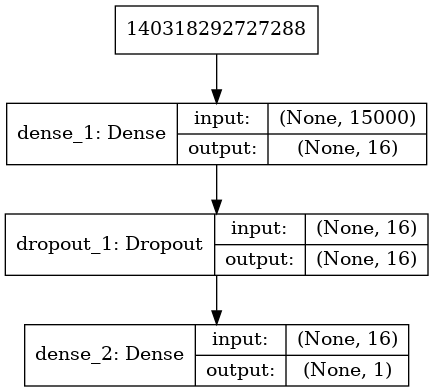

In [44]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'data/model.png')
Image(retina = True, filename = 'data/model.png')

---